# Summary of the CRISP-DM Process


## 1. Business Understanding

The purchase of a home is, for most people, the biggest purchase of their lives. With housing prices rising in recent years, it is natural to want to make a purchase that you will not regret. The answers to the following questions, for example, may help you make a good choice when purchasing a home.

- Q.1 What are the main factors influencing housing prices in Ames, Iowa?
- Q.2 Is there any seasonality in the real estate market?
- Q.3 How does renovation or remodeling affect housing prices?

## 2. Data Understanding
- [Ames Housing Data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), which includes sale prices of residential homes and 79 explanatory variables in Ames, Iowa.
- More information on the dataset can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).
- The dataset has 28 numeric features and 51 categorical features.
- The objective variable, SalePrice, has a slightly left-skewed distribution.

## 3. Prepare Data
- Select high related features without multicollinearity.
- Encode categoricals features by one-hot encoding.
- Standardize numerical features.
- Transfor 'SalePrice' to log scale.


## 4. Model Data
- Train a liner regression model.

## 5. Evaluate the Results
- Calculate metrixs, RMSE and R2 score.

## 6. Deploy
- Predict for test data.


# Answers to the questions, Insights from the data

### Q.1 
What are the main factors influencing housing prices in Ames, Iowa?

### A.1 
The top three variables that positively affected prices were __PoolQC_EX__, __BsmtCond_Gd__, and __BsmtCond_TA__, while the top three variables that negatively affected prices were __Heating_Grav__, __Neighborhood_MeadowV__ and __Functional_Maj2__. It should be understood that properties with pools and basements in good condition will be priced higher. Also, if you are satisfied with the conditions of Gravity furnace and near Meadow Village, you may be able to live in a cheap house.

### Q.2 
Is there any seasonality in the real estate market?

### A.2 
If you are purchasing a home, we recommend that you purchase in March. Also, since the prices tend to rise every year, we recommend that you purchase as soon as possible.The number of purchases is higher in April ~ July, and purchase prices tend to soar in November ~ February and June, although there are no major fluctuations.The average home (with a BsmtCond of TA and a TotalBsmtSF between 950 and 1030) has seen an increase in average price each year, although the number of purchases has decreased slightly each year. 

### Q.3 
How does renovation or remodeling affect housing prices?

### A.3 
Basically, the SalePrice decreases over time, but the decrease tends to be reset by remodeling.

## 2. Data Understanding

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
# Number of numericals and categoricals
df_train.select_dtypes(include=['float', 'int']).shape, df_train.select_dtypes(include=['object', 'bool']).shape

((1460, 38), (1460, 43))

<Axes: xlabel='SalePrice', ylabel='Count'>

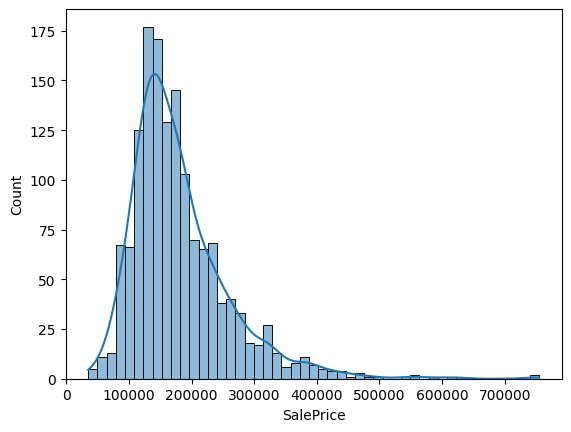

In [6]:
# Distribution of SalePrice
sns.histplot(data=df_train,x='SalePrice', kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

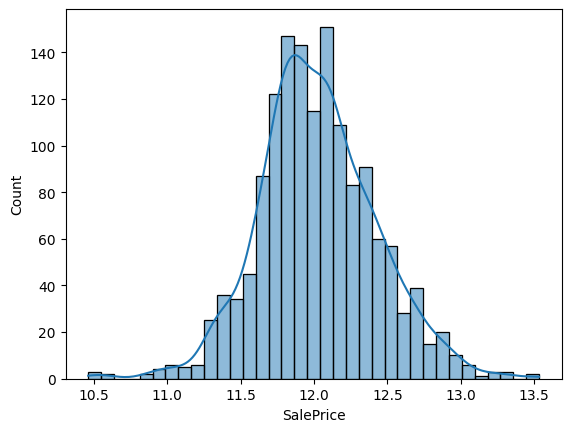

In [7]:
# Distribution of log(SalePrice)
sns.histplot(data=np.log(df_train['SalePrice']), kde=True)

In [8]:
# Add features related age and remode
df_train["isRemod"] = (df_train["YearBuilt"] != df_train["YearRemodAdd"])
df_test["isRemod"] = (df_test["YearBuilt"] != df_test["YearRemodAdd"])

df_train["Age"] = (df_train["YrSold"] - df_train["YearBuilt"])
df_test["Age"] = (df_test["YrSold"] - df_test["YearBuilt"])

df_train["AgeFromRemod"] = (df_train["YrSold"] - df_train["YearRemodAdd"])
df_test["AgeFromRemod"] = (df_test["YrSold"] - df_test["YearRemodAdd"])

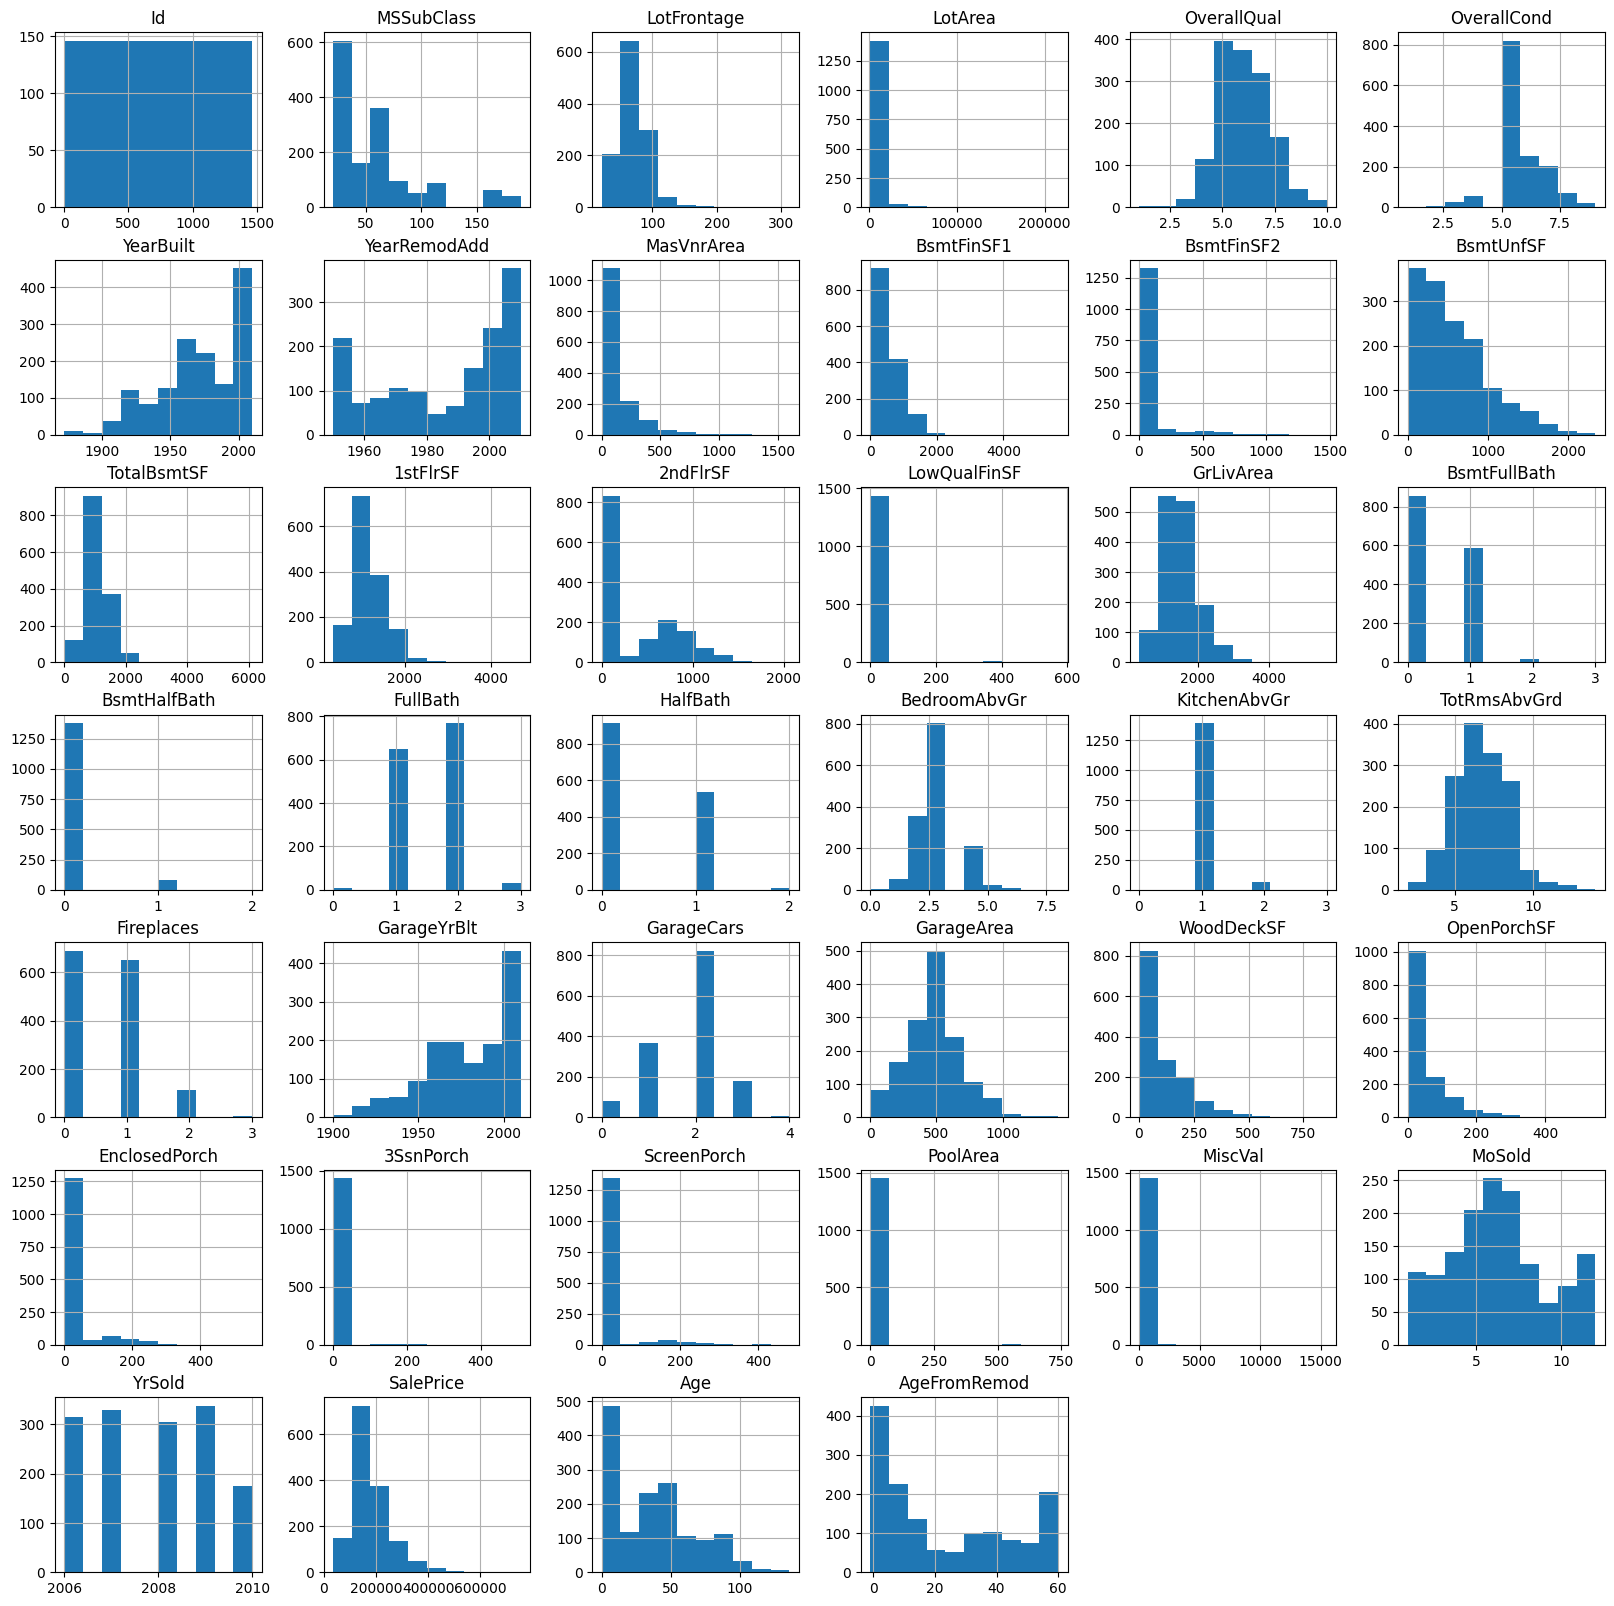

In [9]:
# Show histgrams
df_train.hist(figsize=(20,20));

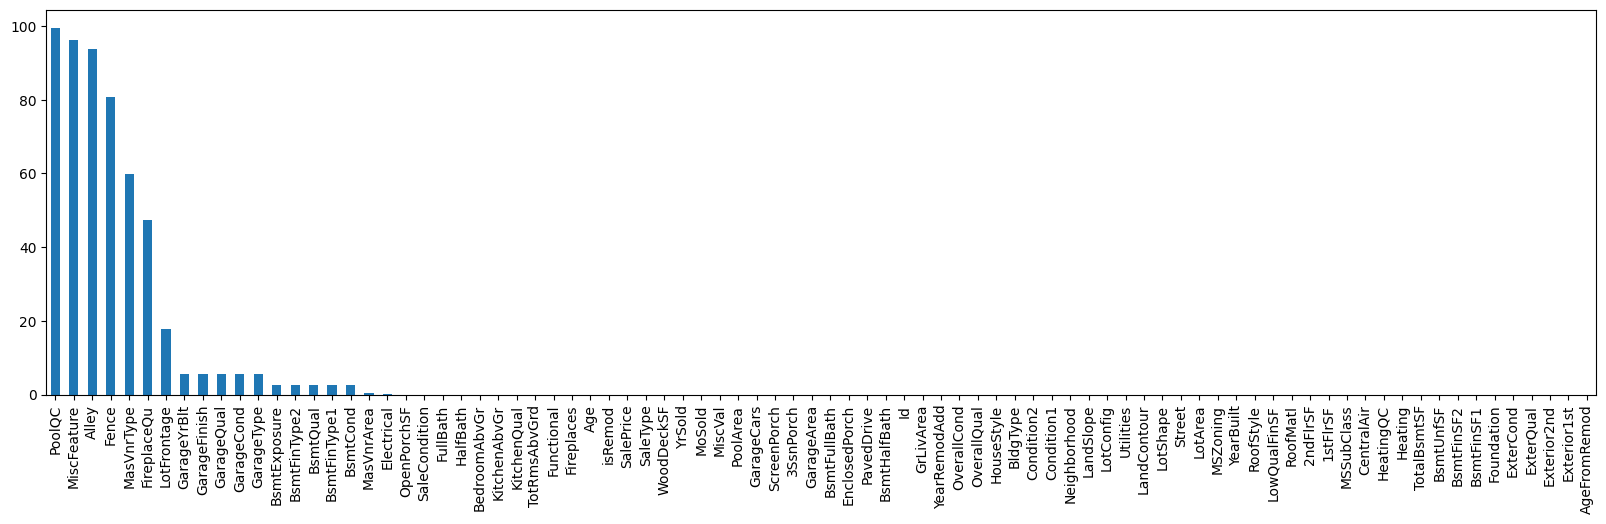

In [10]:
# Rate of Null
(df_train.isnull().sum() / len(df_train) * 100).sort_values(ascending=False).plot(kind='bar', figsize=(20,5));

### Numerical features

In [11]:
# Define a dataframe of numericals
df_train_numerical = df_train.select_dtypes(include=['float', 'int'])

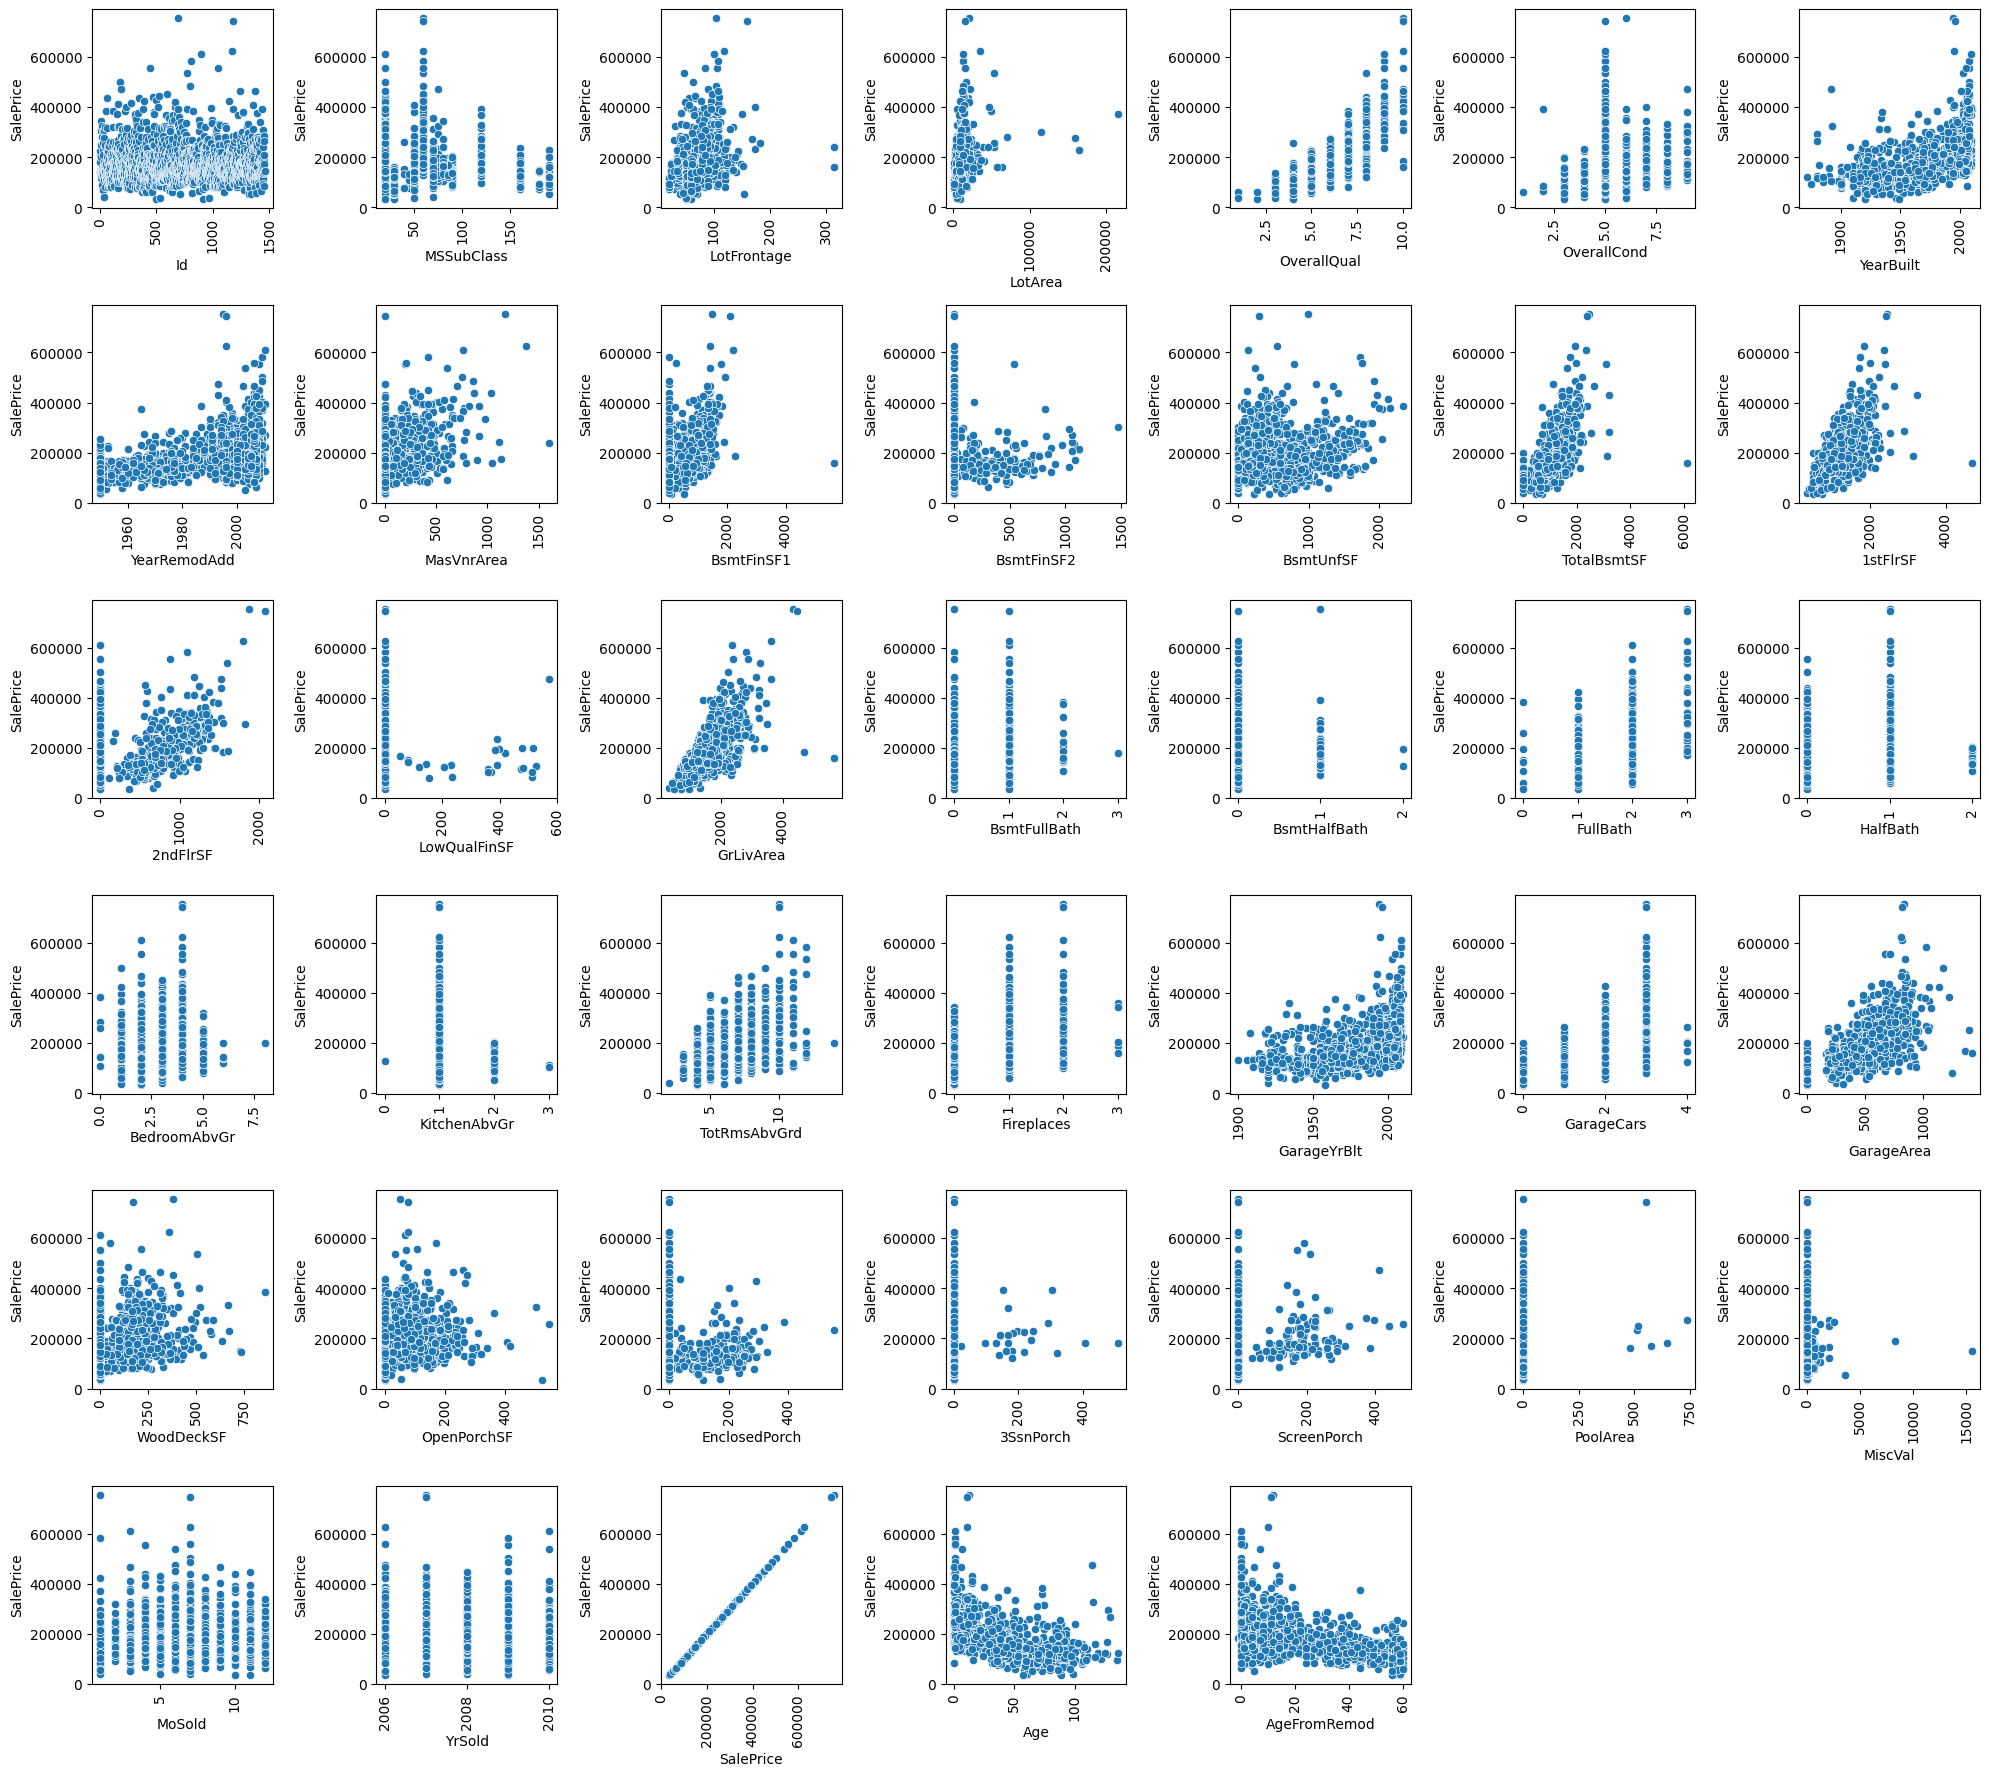

In [12]:
# Show correlation by scatterplot
plt.figure(figsize=(20,20))
for i,c in enumerate(df_train_numerical.columns):
    plt.subplot(7,7,i+1)
    sns.scatterplot(data=df_train, x=c, y='SalePrice')
    plt.xticks(rotation=90)
plt.tight_layout()

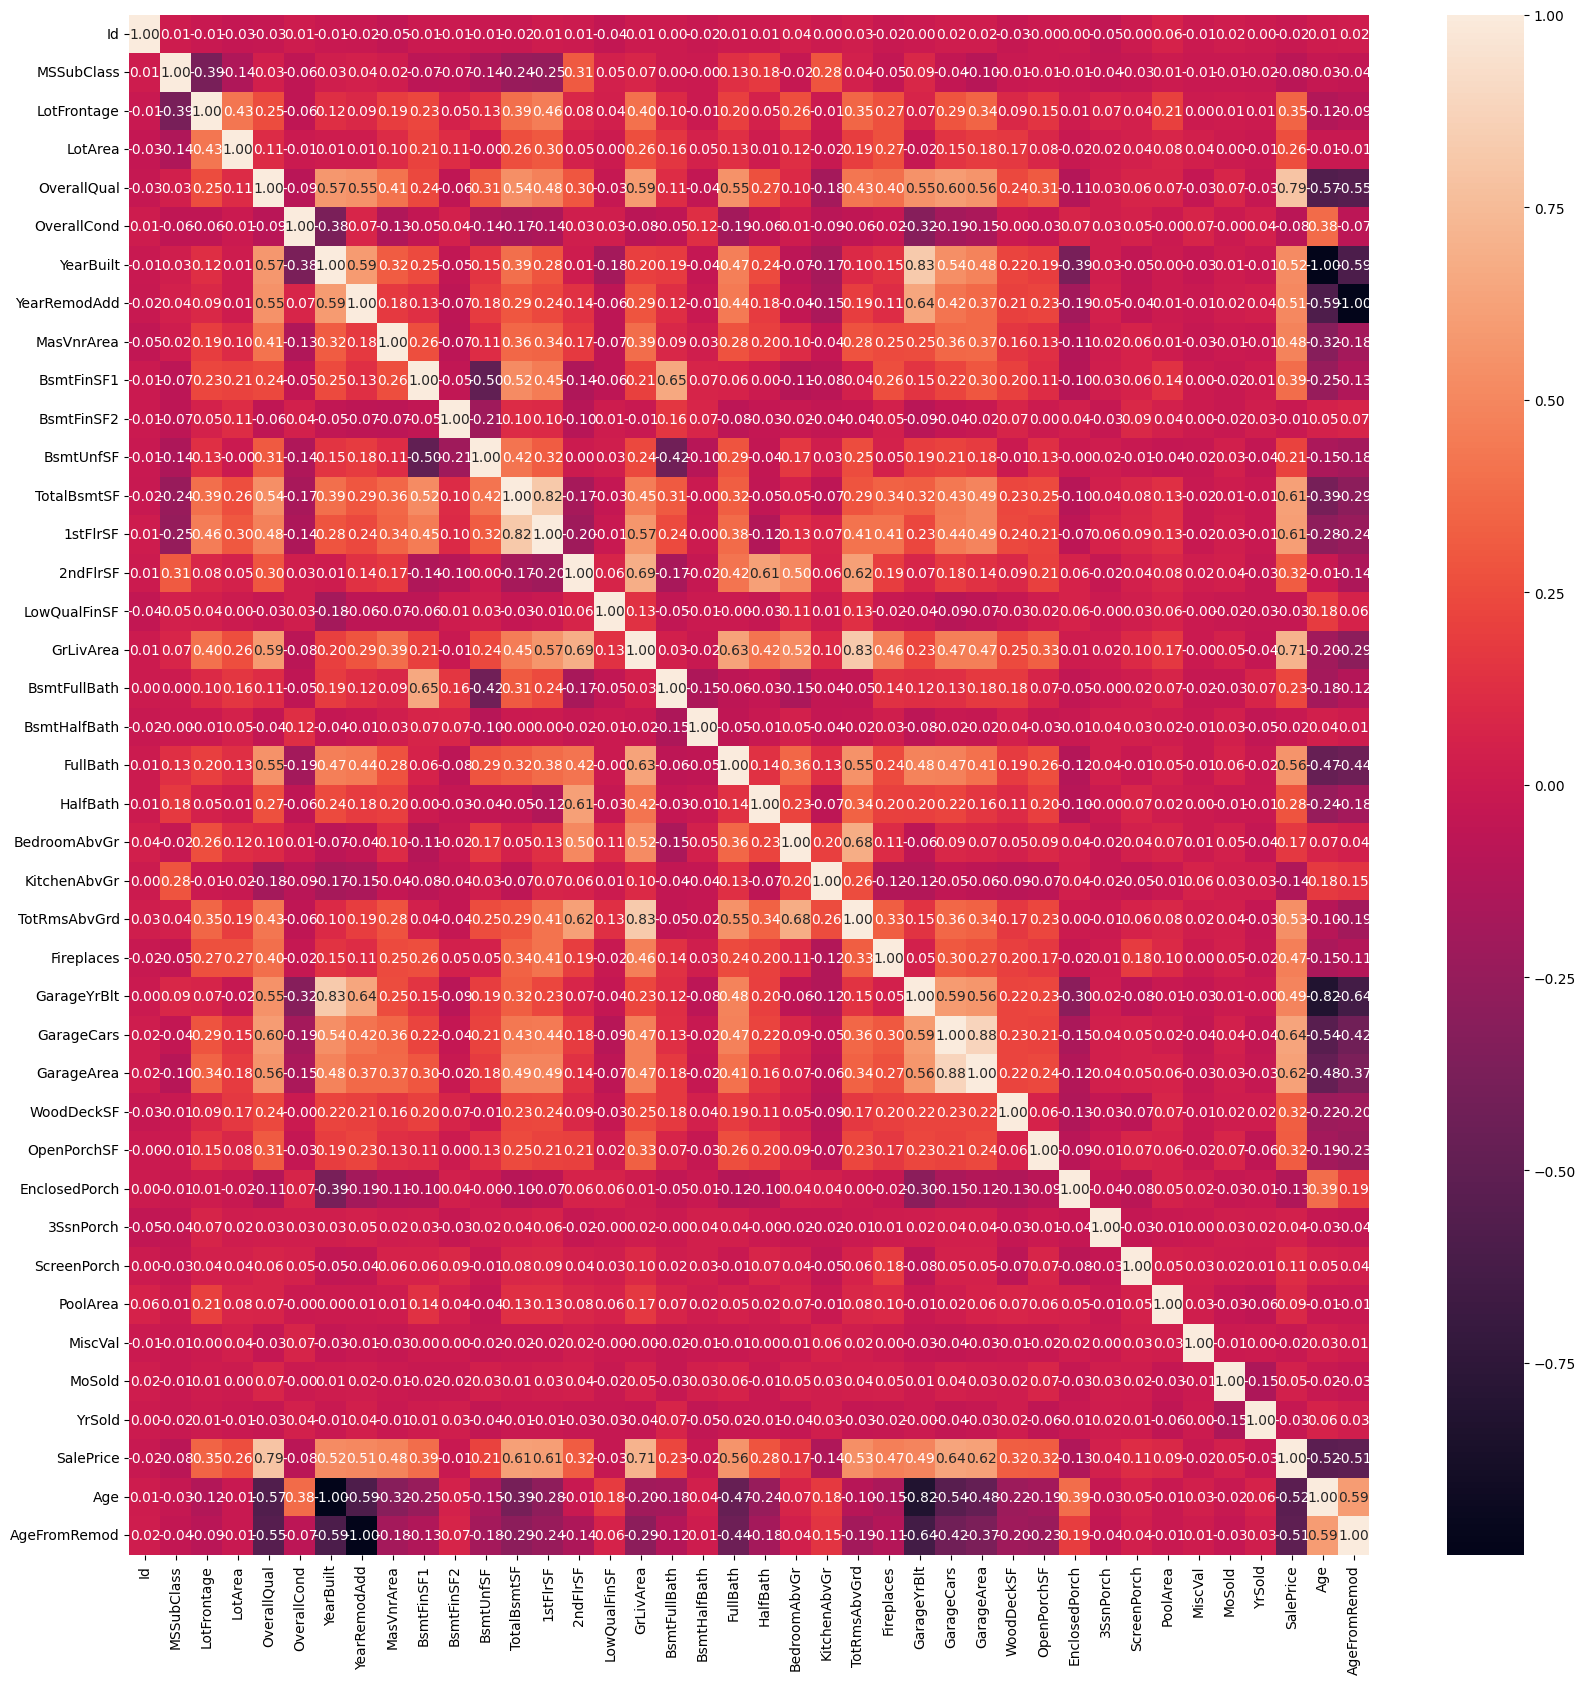

In [13]:
# Show correlation by heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_train_numerical.corr(), annot=True, fmt=".2f", ax=ax);

In [14]:
# High related features with SalePrice
cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'Age']

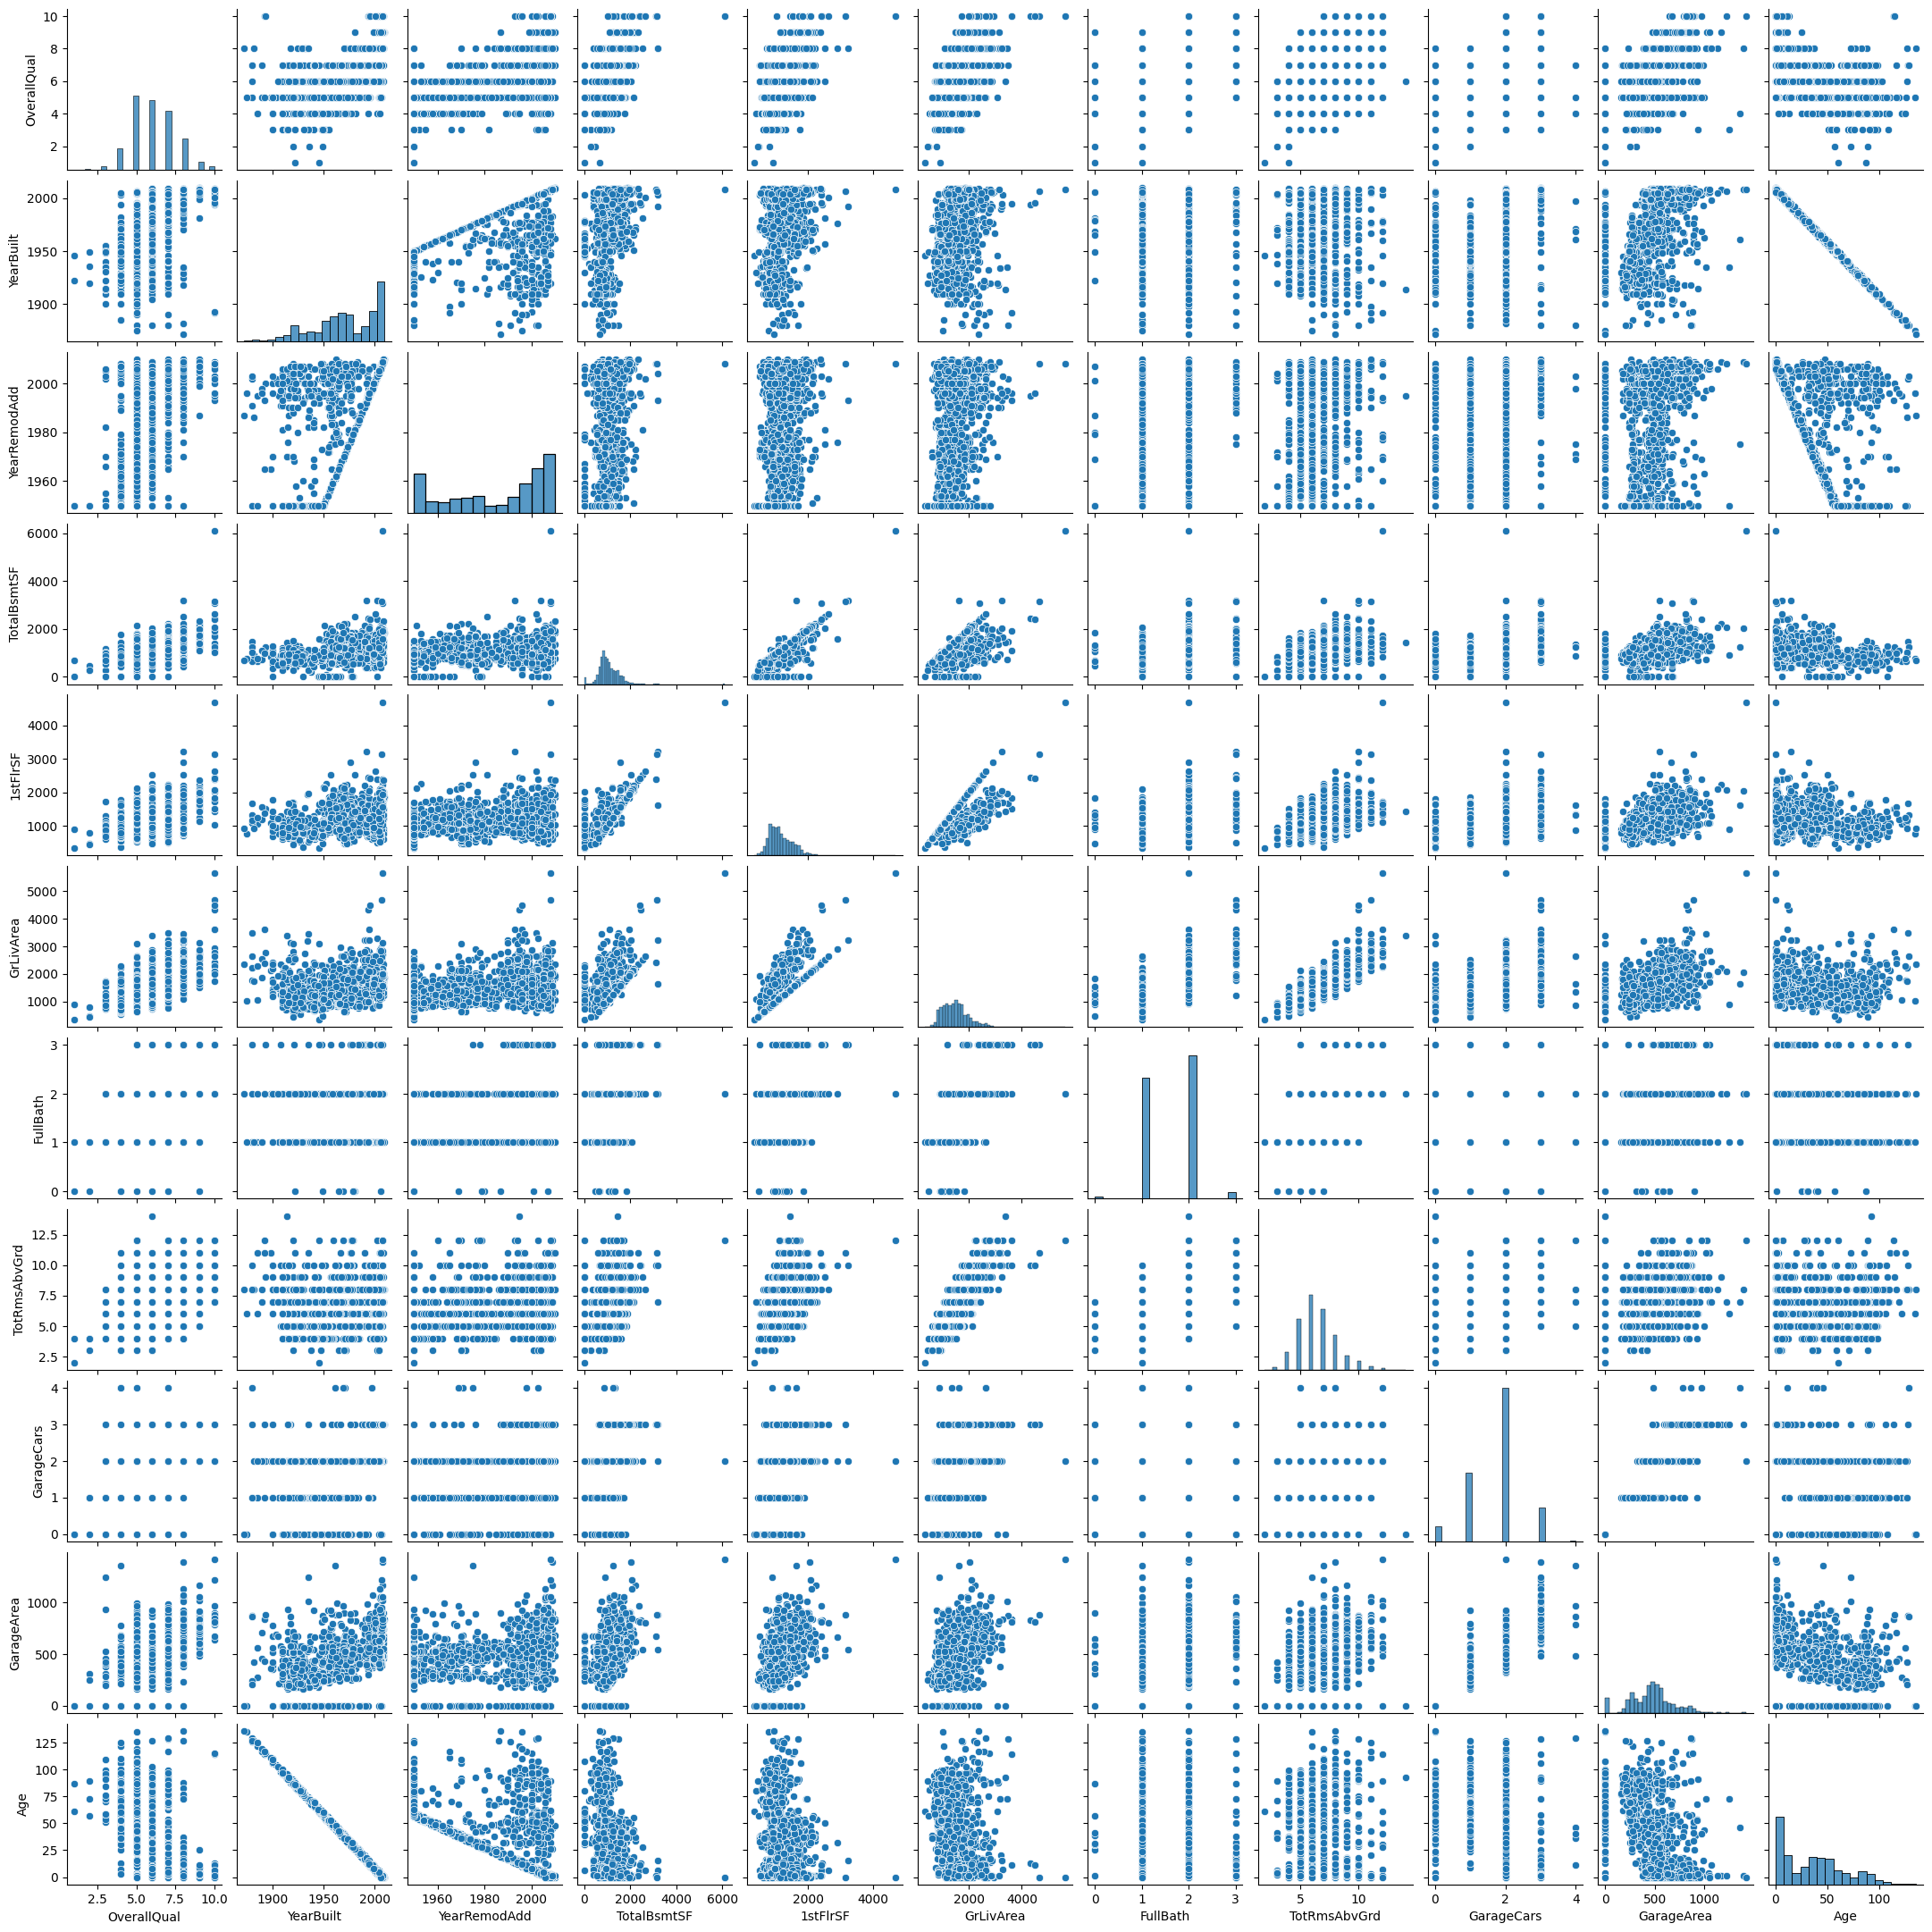

In [15]:
# Check multicollinearity
sns.pairplot(df_train_numerical[cols], size=2.0)

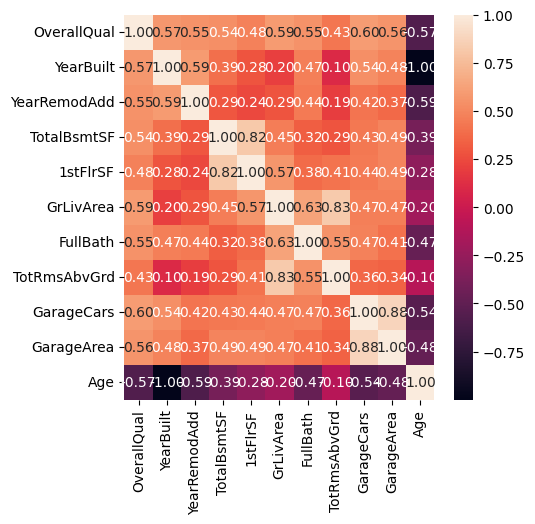

In [16]:
# Check multicollinearity
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df_train_numerical[cols].corr(), annot=True, fmt=".2f", ax=ax);

In [17]:
# Fill NA
for col in df_train_numerical.drop('SalePrice', axis=1).columns:   
    df_train_numerical[col].fillna((df_train_numerical[col].mean()), inplace=True)

In [18]:
# Select features by Variance Inflation Factor, VIF
df_train_for_vif = df_train_numerical.drop('SalePrice', axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_train_for_vif.values, i) for i in range(df_train_for_vif.shape[1])]
vif.index = df_train_for_vif.columns

while True:
    df_vif = df_train_for_vif[vif.index].copy()
    vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
    if(vif["VIF Factor"].max(axis = 0) > 10):
        vif = vif.drop(vif["VIF Factor"].idxmax(axis = 0), axis = 0)
    else:
        break

In [19]:
cols_no_multico = vif.index.tolist()

In [20]:
cols_no_multico.append('SalePrice')

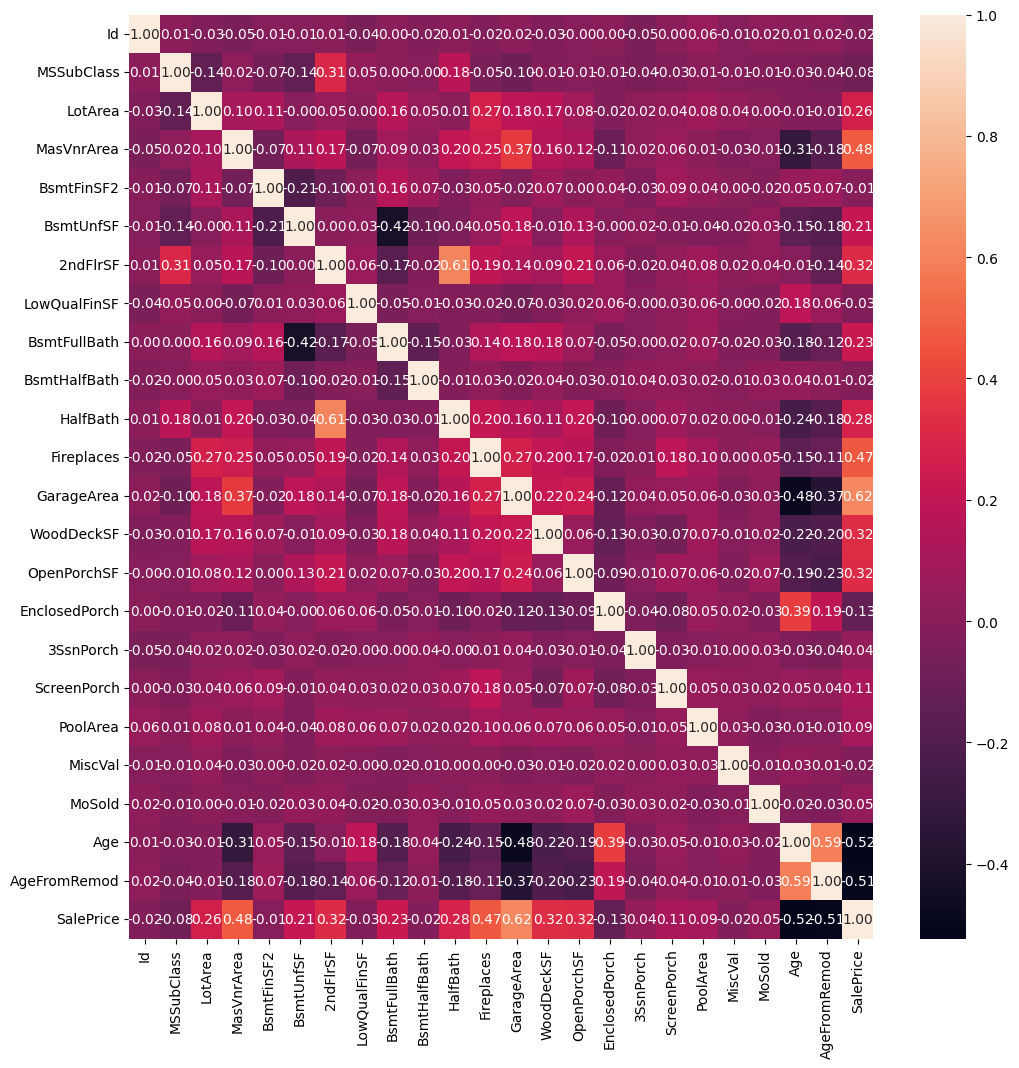

In [21]:
# Show heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_train_numerical[cols_no_multico].corr(), annot=True, fmt=".2f", ax=ax);

### Categorical features

In [22]:
# Define a dataframe of categoricals
df_train_categorical = df_train.select_dtypes(include=['object', 'bool'])

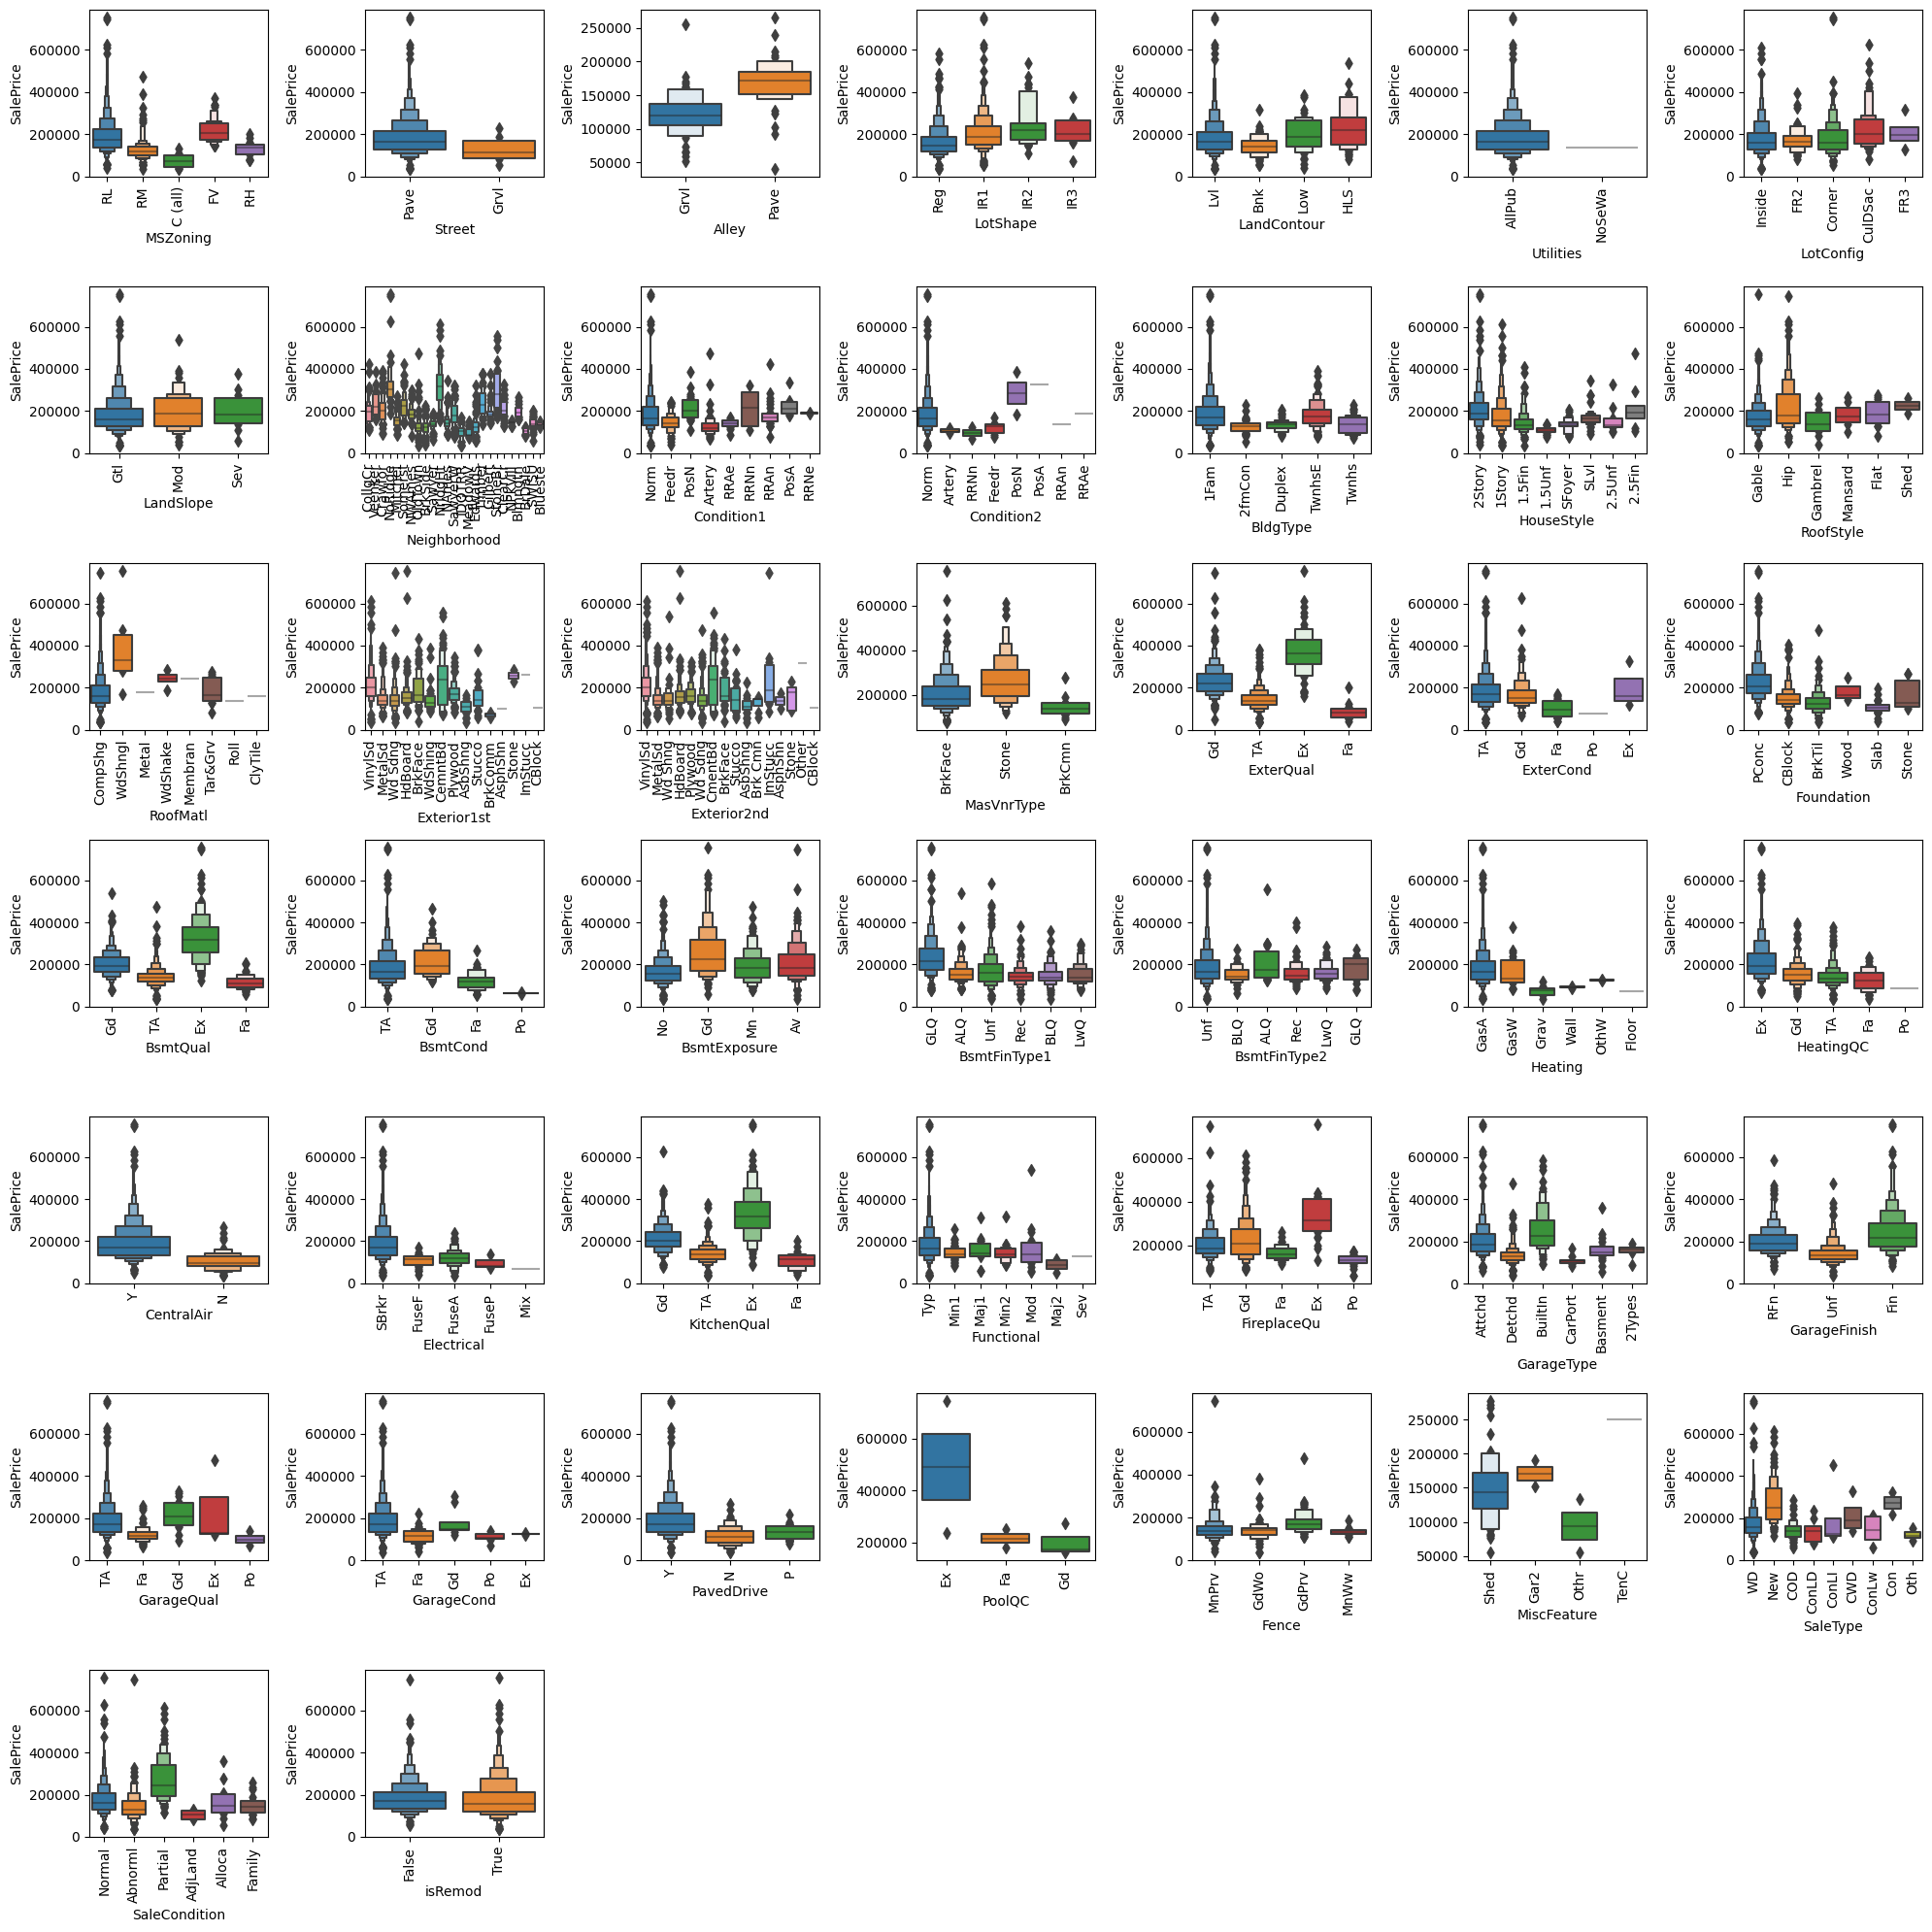

In [23]:
# Show all
plt.figure(figsize=(20,20))
for i,c in enumerate(df_train_categorical.columns):
    plt.subplot(7,7,i+1)
    sns.boxenplot(data=df_train, x=c, y='SalePrice')
    plt.xticks(rotation=90)
plt.tight_layout()

In [24]:
# Get dummies 
for var in df_train_categorical.columns:
    df_train_categorical = pd.concat([df_train_categorical.drop(var, axis=1), pd.get_dummies(df_train_categorical[var], prefix=var, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)

In [25]:
df_train_categorical

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  MSZoning_nan  \
0           False        False         True        False         False   
1           False        False         True        False         False   
2           False        False         True        False         False   
3           False        False         True        False         False   
4           False        False         True        False         False   
...           ...          ...          ...          ...           ...   
1455        False        False         True        False         False   
1456        False        False         True        False         False   
1457        False        False         True        False         False   
1458        False        False         True        False         False   
1459        False        False         True        False         False   

      Street_Pave  Street_nan  Alley_Pave  Alley_nan  LotShape_IR2  ...  \
0            True       False       False       True         False  ...   
1            True       False       False       True         False  ...   
2            True       False       False       True         False  ...   
3            True       False       False       True         False  ...   
4            True       False       False       True         False  ...   
...           ...         ...         ...        ...           ...  ...   
1455         True       False       False       True         False  ...   
1456         True       False       False       True         False  ...   
1457         True       False       False       True         False  ...   
1458         True       False       False       True         False  ...   
1459         True       False       False       True         False  ...   

      SaleType_WD  SaleType_nan  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            True         False                  False                 False   
1            True         False                  False                 False   
2            True         False                  False                 False   
3            True         False                  False                 False   
4            True         False                  False                 False   
...           ...           ...                    ...                   ...   
1455         True         False                  False                 False   
1456         True         False                  False                 False   
1457         True         False                  False                 False   
1458         True         False                  False                 False   
1459         True         False                  False                 False   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                    False                  True                  False   
1                    False                  True                  False   
2                    False                  True                  False   
3                    False                 False                  False   
4                    False                  True                  False   
...                    ...                   ...                    ...   
1455                 False                  True                  False   
1456                 False                  True                  False   
1457                 False                  True                  False   
1458                 False                  True                  False   
1459                 False                  True                  False   

      SaleCondition_nan  isRemod_True  isRemod_nan  
0                 False         False        False  
1                 False         False        False  
2                 False          True        False  
3                 False          True        False  
4                 False         False        False  
...                 ...           ..

### Auto EDA

In [26]:
# AutoEDA by pandas_profiling
import pandas_profiling as pp
profile = pp.ProfileReport(df_train)
profile.to_file(output_file="EDA_by_pandas_prolileing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
pp.ProfileReport(df_train, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Prepare Data

In [28]:
# Show list of low multicollinearity
vif.index.tolist()

['Id',
 'MSSubClass',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age',
 'AgeFromRemod']

In [29]:
# Select features with low multicollinearity

# cols_to_need = vif.index.tolist()
cols_to_need = ['GarageArea', 'MasVnrArea', 'Fireplaces', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'Age'] # CORR>=0.3 wtih SalePrice
# cols_to_need = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

cols_to_need.extend(df_train.select_dtypes(include=['object', 'bool']).columns.tolist())
cols_to_need.append('SalePrice')

In [30]:
# Prepare clean dataset
df_train_2 = df_train[cols_to_need]
df_test_2 = df_test[df_train_2.drop('SalePrice', axis=1).columns.tolist()]

## 4. Model Data

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define data preprocessing and model pipeline
# 1) preprocessing
# For numericals, Set mean imputation and standard scaling
numeric_features = df_train_2.select_dtypes(include=['float', 'int']).drop(['SalePrice'], axis=1).columns.tolist()
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)
# For categoricals, Set one-hot encoding and percentile feature selection
categorical_features = df_train_2.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(f_regression, percentile=50)),
    ]
)
# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
# 2) model pipline
reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression(fit_intercept=True))]
)

# Split the data into training and validation sets
X = df_train_2.drop(['SalePrice'], axis=1)
y = np.log(df_train_2['SalePrice'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
reg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = reg.predict(X_valid)

# Calculate the model score
model_score = reg.score(X_valid, y_valid)
print("Model score: %.3f" % model_score)
print("RMSE: %.3f" % mean_squared_error(y_valid,y_pred_valid, squared=False))

Model score: 0.839
RMSE: 0.165


In [32]:
reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['GarageArea', 'MasVnrArea',
                                                   'Fireplaces', '2ndFlrSF',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    sc...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor', LinearRegression())])

<Axes: xlabel='coef', ylabel='feature_name'>

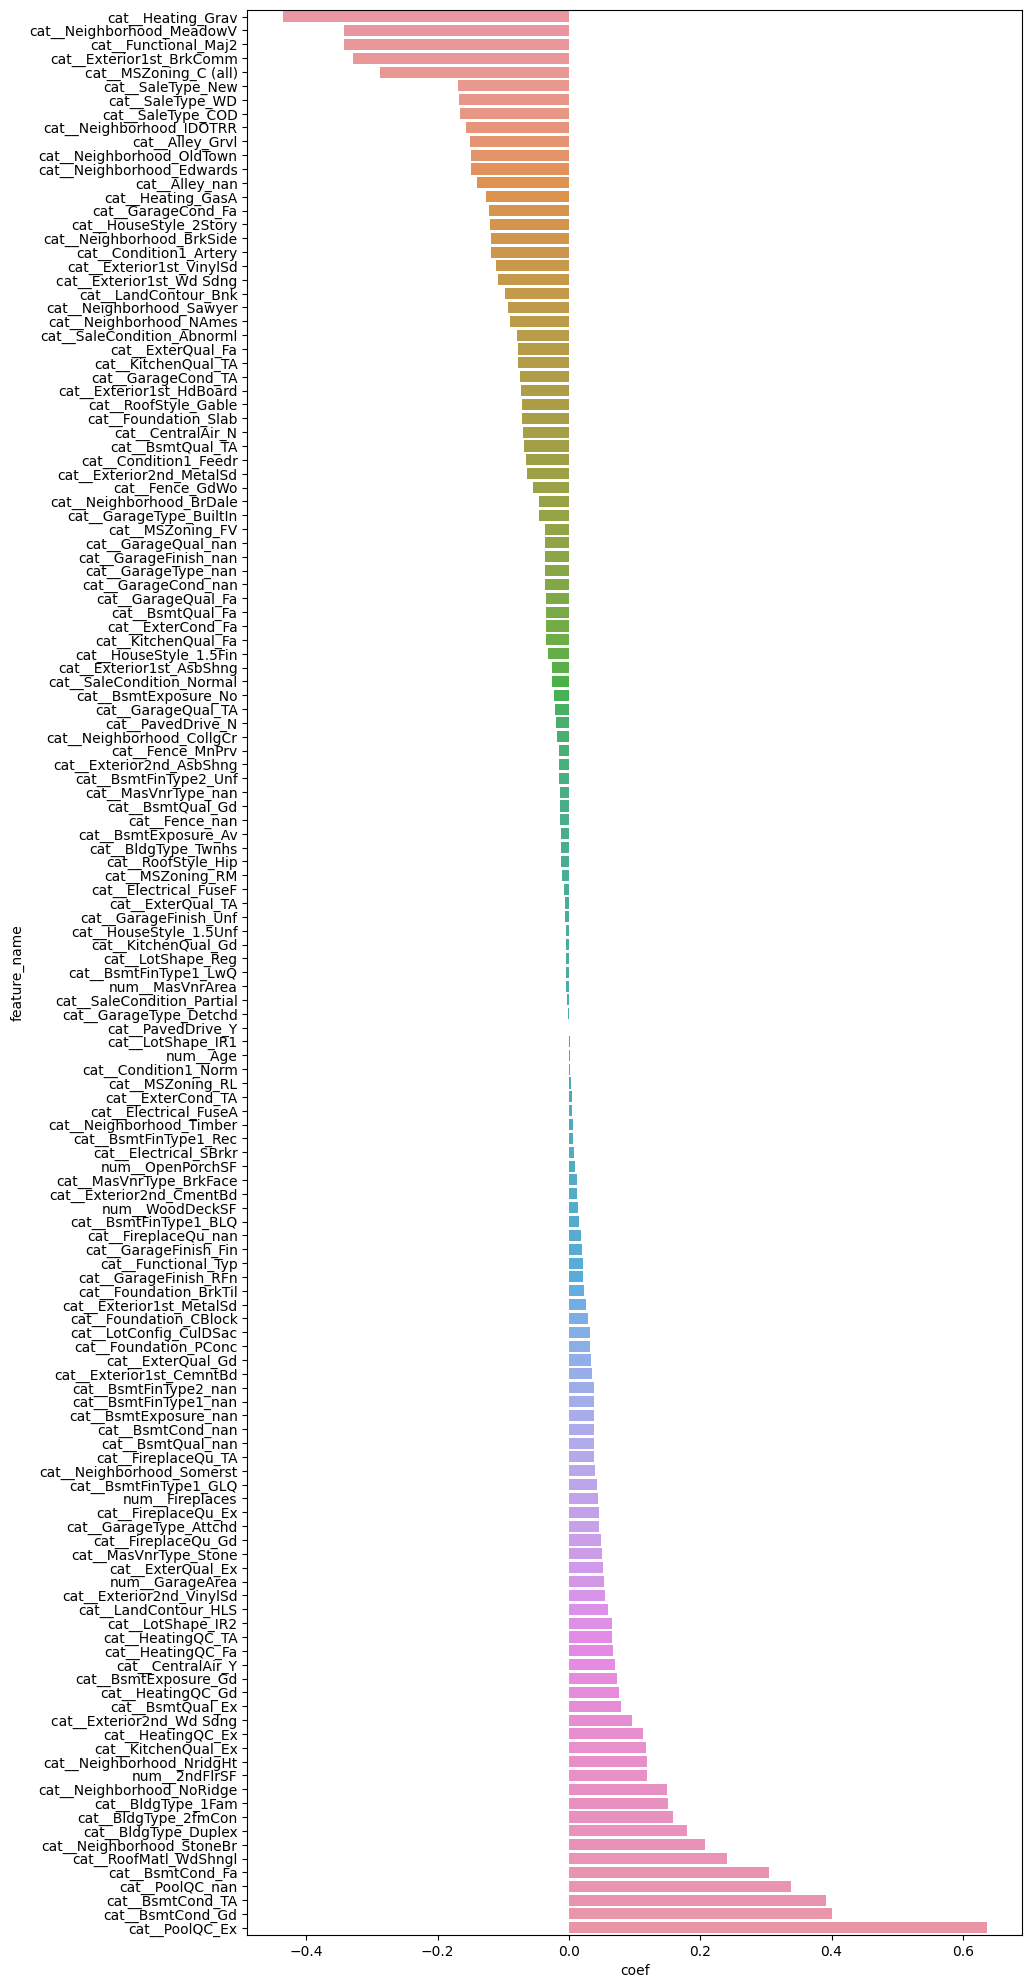

In [33]:
df_coef = pd.DataFrame({'coef': reg.named_steps['regressor'].coef_, 'feature_name': reg[:-1].get_feature_names_out()})
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=df_coef, x='coef', y='feature_name', order=df_coef.sort_values('coef').feature_name, ax=ax)

#### ✔The top three variables that positively affected prices were __PoolQC_EX__, __BsmtCond_Gd__, and __BsmtCond_TA__, while the top three variables that negatively affected prices were __Heating_Grav__, __Neighborhood_MeadowV__ and __Functional_Maj2__. 

## 5. Evaluate the Results

In [34]:
y_valid_preds = reg.predict(X_valid)
r2 = r2_score(y_valid, y_valid_preds)
print("Model score: %.3f" % r2)
print("RMSE: %.3f" % mean_squared_error(y_valid,y_pred_valid, squared=False))

Model score: 0.839
RMSE: 0.165


### About price for average house...

In [35]:
for c in ["BsmtCond", "Neighborhood"]:
    print(c, df_train[c].mode().values[0])
    
for c in ['TotalBsmtSF']:
    print(c, df_train[c].median())

BsmtCond TA
Neighborhood NAmes
TotalBsmtSF 991.5


In [36]:
# condition_average = "BsmtCond == 'TA' & Neighborhood == 'NAmes' & 950.0 < TotalBsmtSF & TotalBsmtSF < 1030"
condition_average = "BsmtCond == 'TA' & 950.0 < TotalBsmtSF & TotalBsmtSF < 1030"

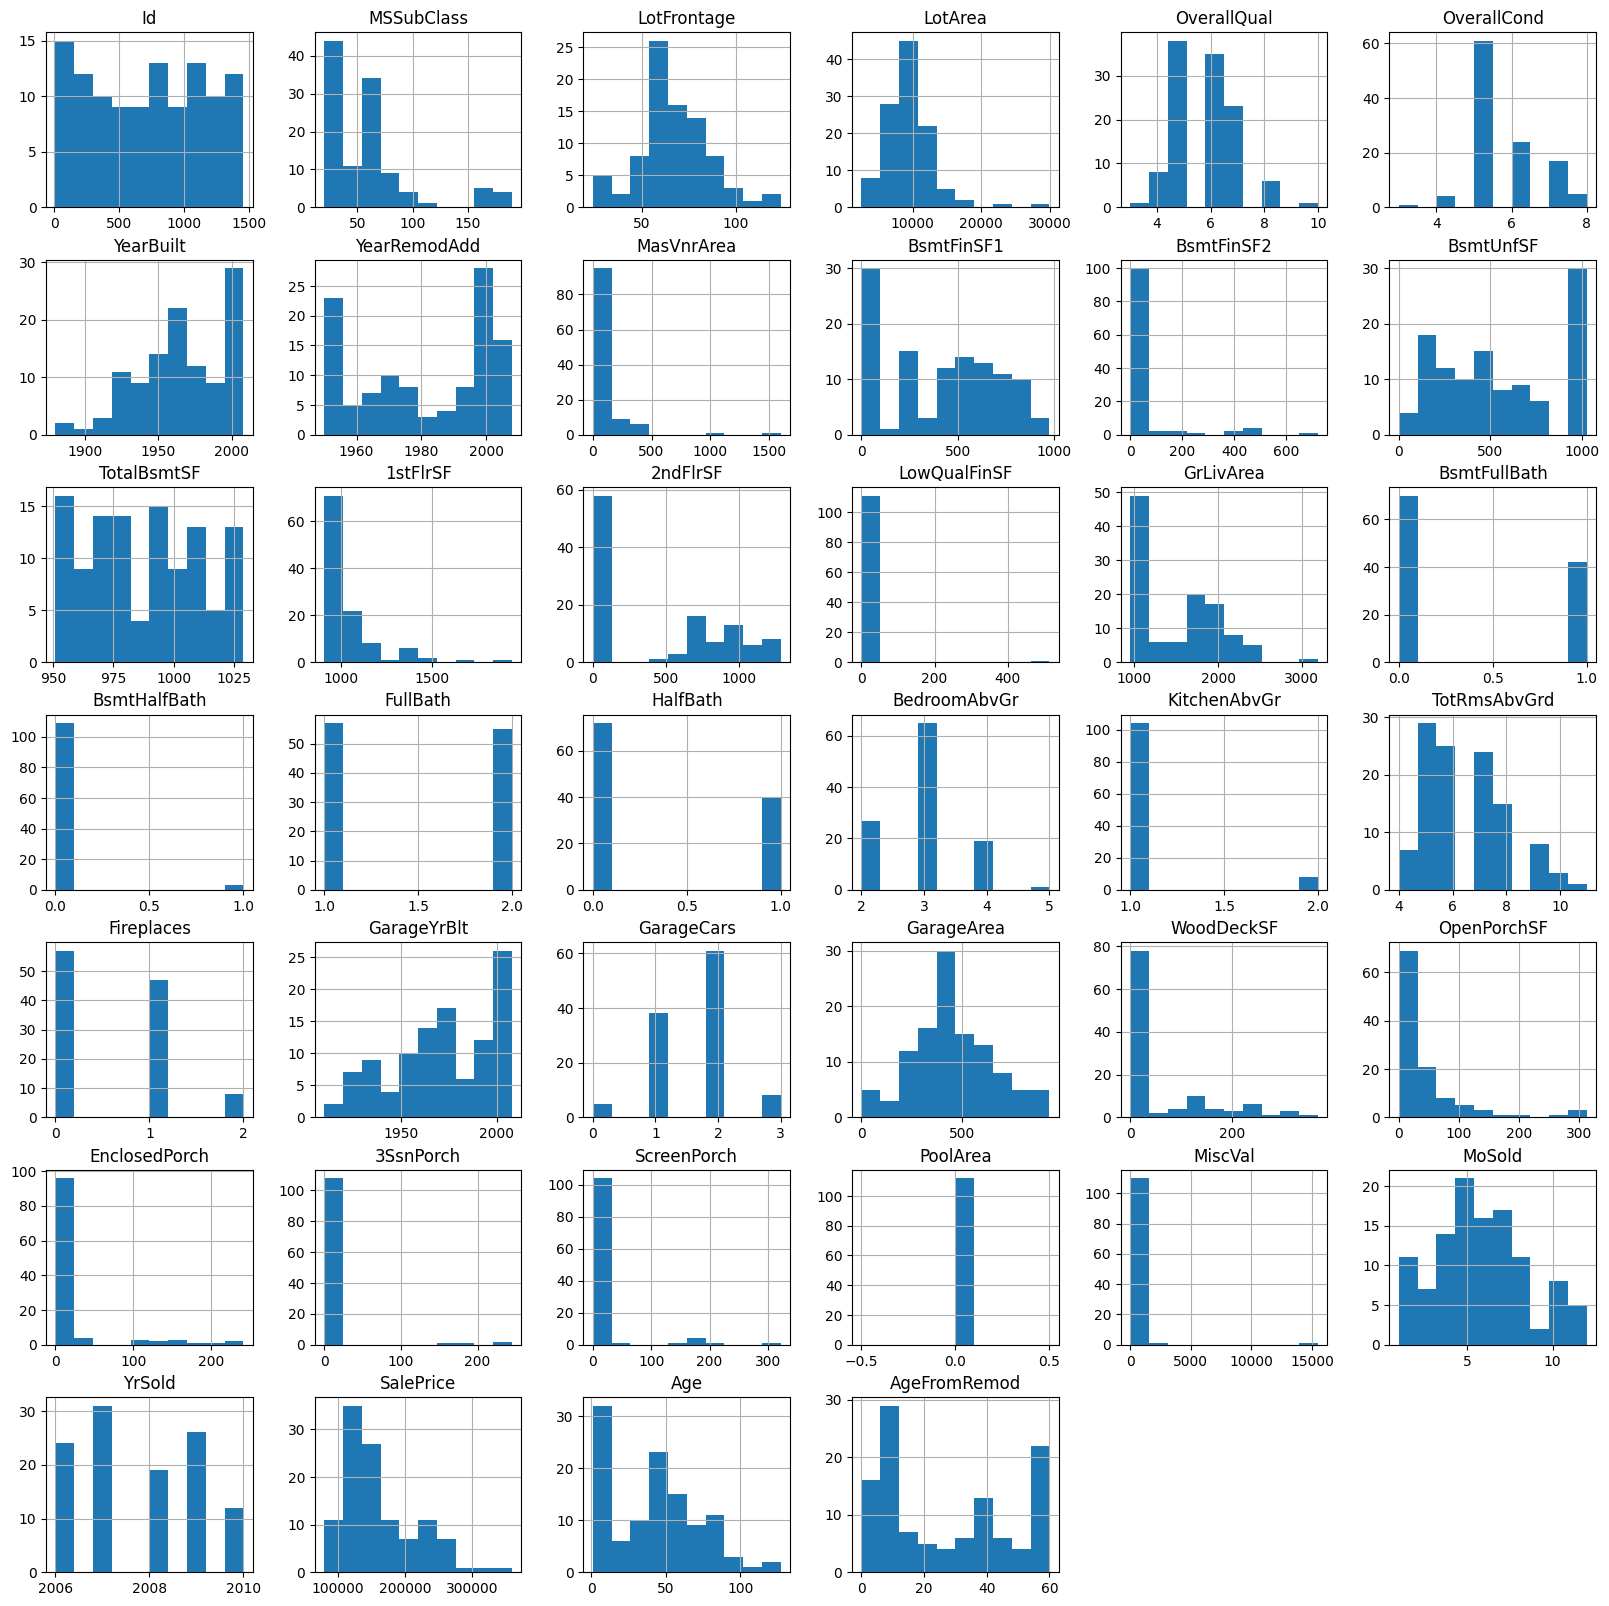

In [37]:
df_train.query(condition_average).hist(figsize=(20,20));

### Yearly seasonality

<Axes: xlabel='YrSold', ylabel='Count'>

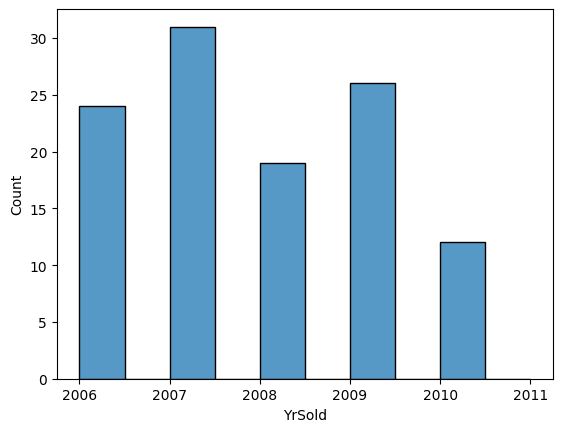

In [38]:
sns.histplot(data=df_train.query(condition_average), x='YrSold', binrange=[2006,2011])

<Axes: xlabel='YrSold', ylabel='SalePrice'>

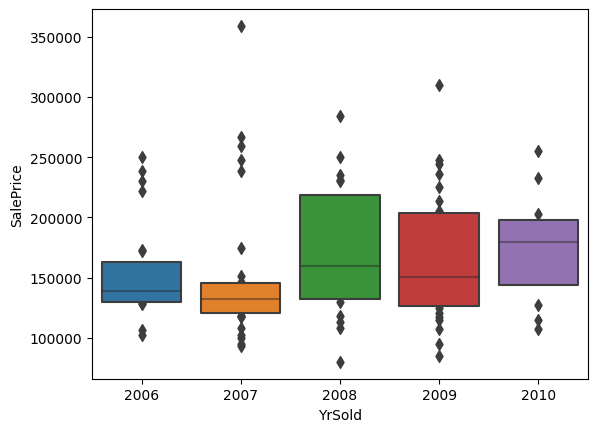

In [39]:
sns.boxenplot(data=df_train.query(condition_average), x='YrSold', y='SalePrice')

<Axes: xlabel='YrSold', ylabel='SalePrice'>

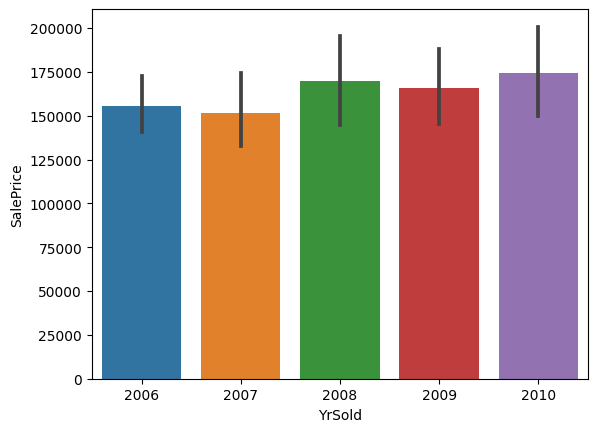

In [40]:
sns.barplot(data=df_train.query(condition_average), x='YrSold', y='SalePrice')

#### ✔The average home (with a BsmtCond of TA and a TotalBsmtSF between 950 and 1030) has seen an increase in average price, although the number of purchases has decreased slightly each year.

### Monthly seasonality

<Axes: xlabel='MoSold', ylabel='Count'>

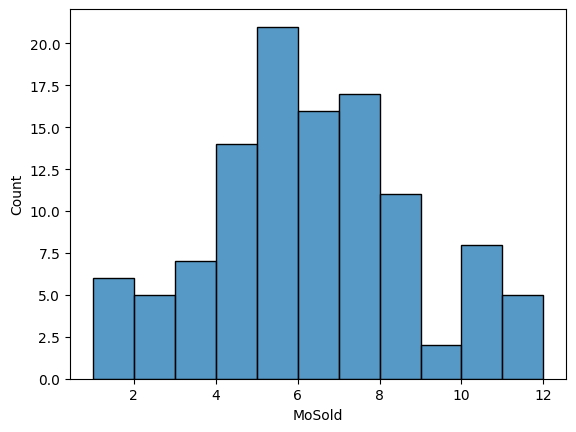

In [41]:
sns.histplot(data=df_train.query(condition_average), x='MoSold', binwidth=1)

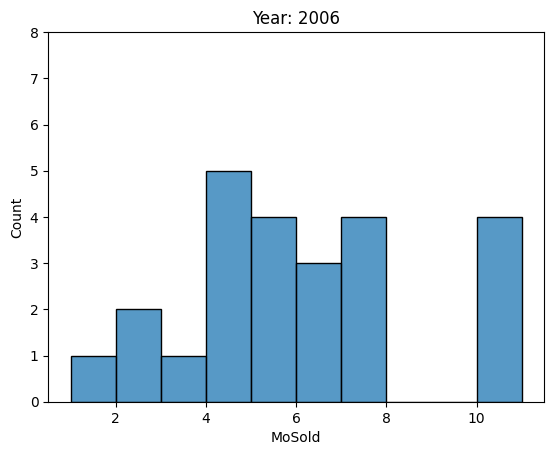

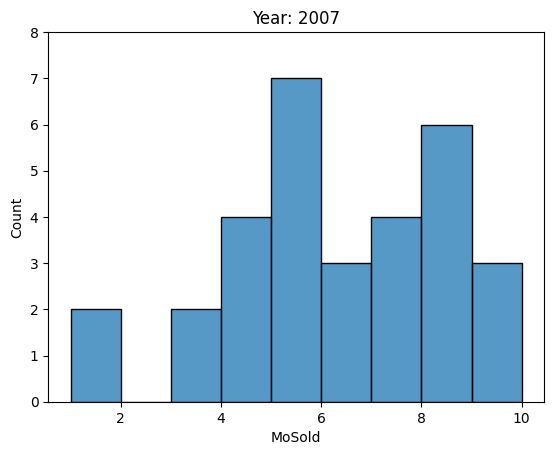

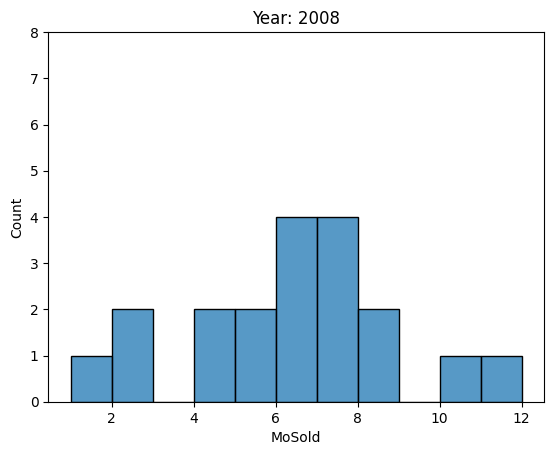

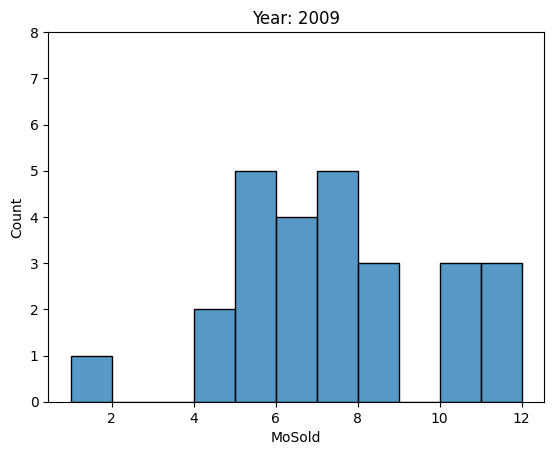

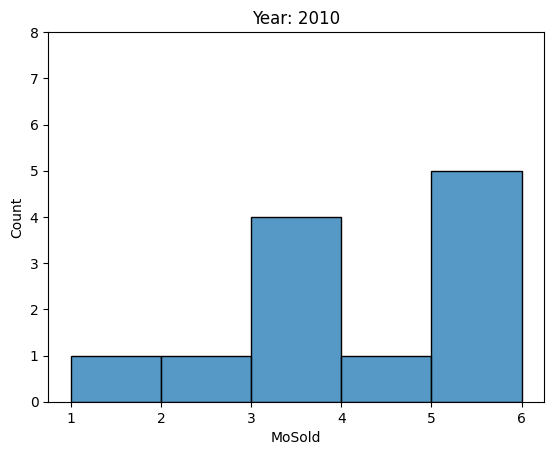

In [42]:
for y in sorted(df_train.query(condition_average).YrSold.unique()):
    plt.figure()
    sns.histplot(data=df_train.query(condition_average).query('YrSold == @y'), x='MoSold', binwidth=1)
    plt.title('Year: ' + str(y))
    plt.ylim([0, 8])

<Axes: xlabel='MoSold', ylabel='SalePrice'>

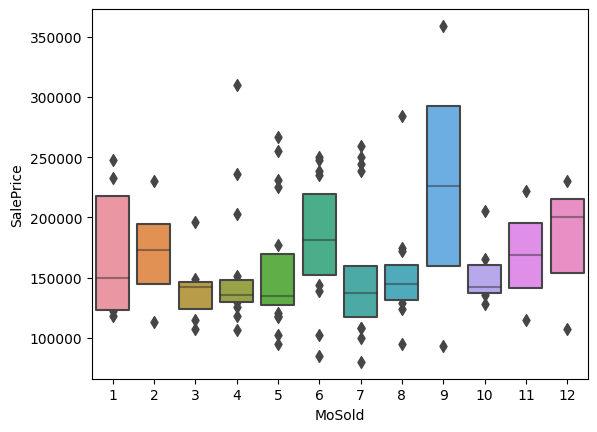

In [43]:
sns.boxenplot(data=df_train.query(condition_average), x='MoSold', y='SalePrice')

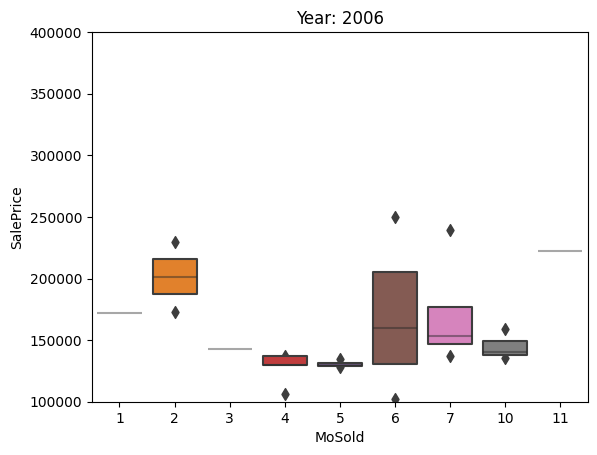

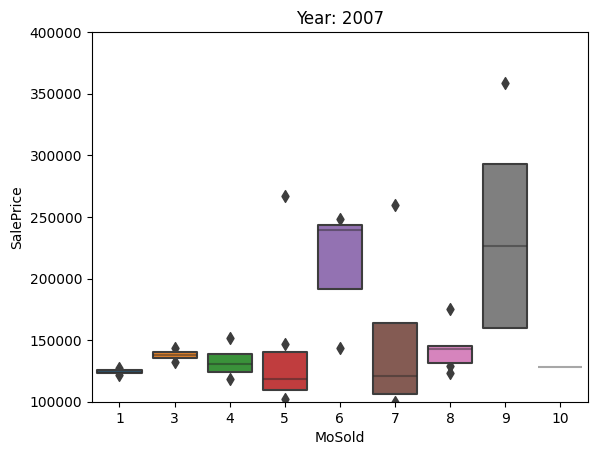

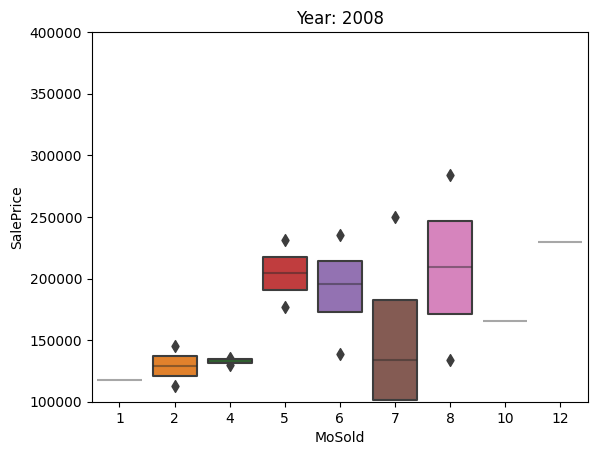

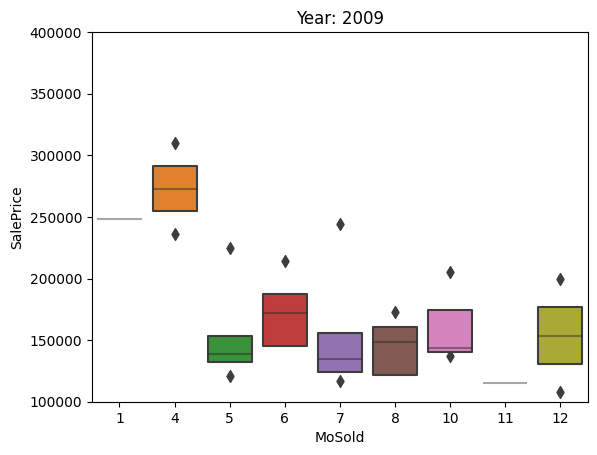

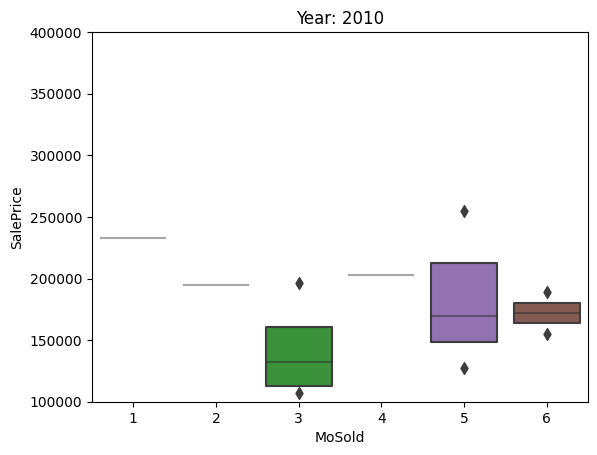

In [44]:
for y in sorted(df_train.query(condition_average).YrSold.unique()):
    plt.figure()
    sns.boxenplot(data=df_train.query(condition_average).query('YrSold == @y'), x='MoSold', y='SalePrice')
    plt.title('Year: ' + str(y))
    plt.ylim([100000, 400000])

<Axes: xlabel='MoSold', ylabel='SalePrice'>

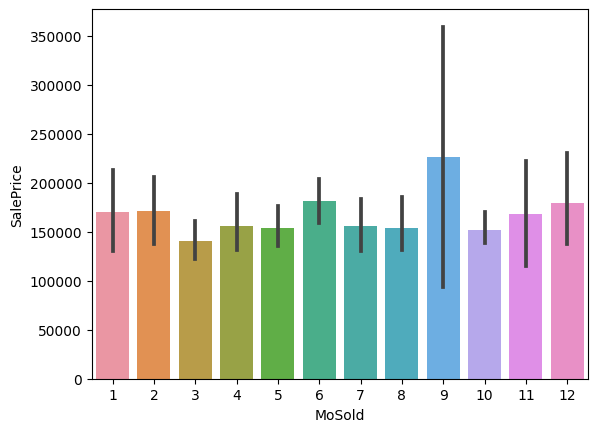

In [45]:
sns.barplot(data=df_train.query(condition_average), x='MoSold', y='SalePrice')

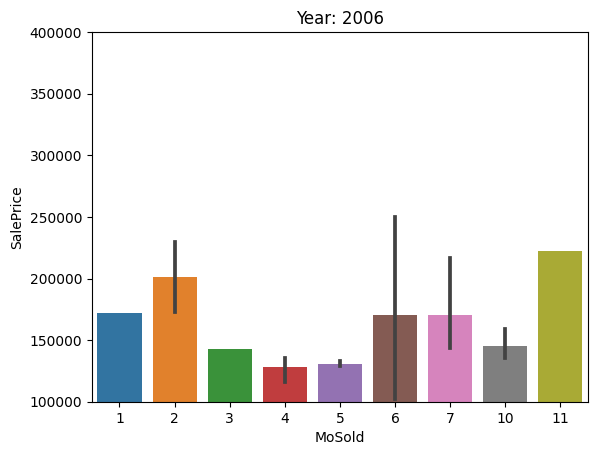

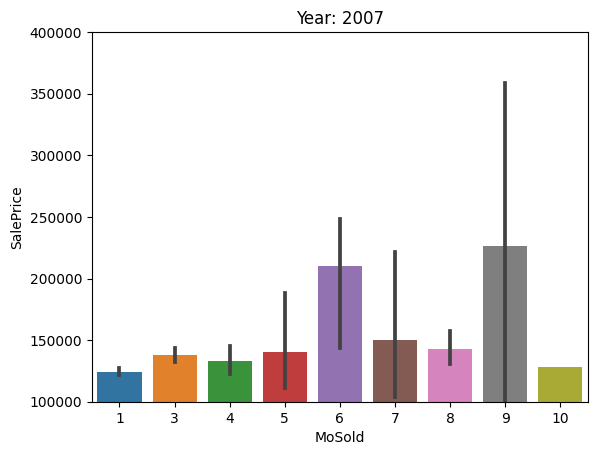

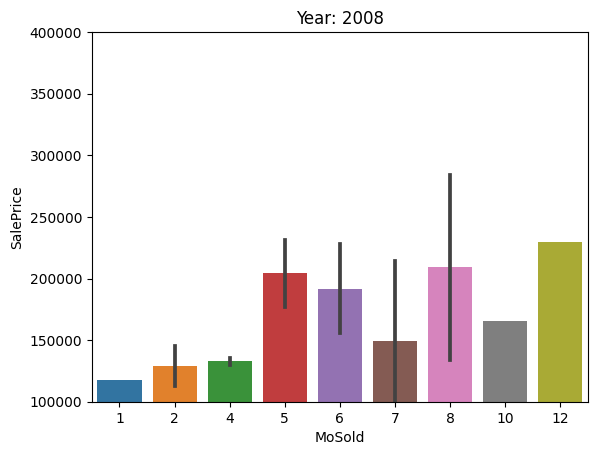

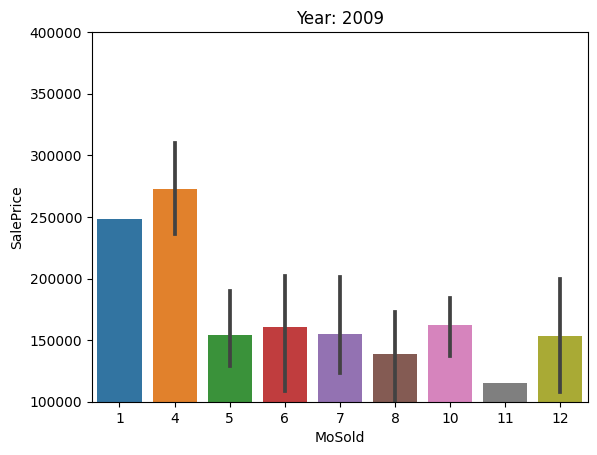

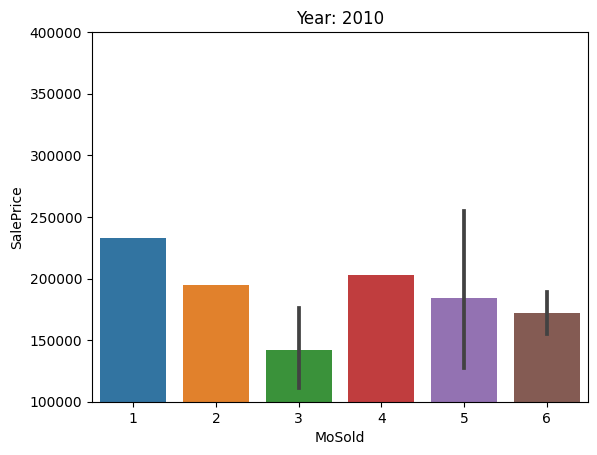

In [46]:
for y in sorted(df_train.query(condition_average).YrSold.unique()):
    plt.figure()
    sns.barplot(data=df_train.query(condition_average).query('YrSold == @y'), x='MoSold', y='SalePrice')
    plt.title('Year: ' + str(y))
    plt.ylim([100000, 400000])

#### ✔On a monthly basis, the number of purchases is higher in April ~ July, and purchase prices tend to soar in November ~ February and June, although there are no major fluctuations.

### Effect of remodeling

<Axes: xlabel='isRemod', ylabel='SalePrice'>

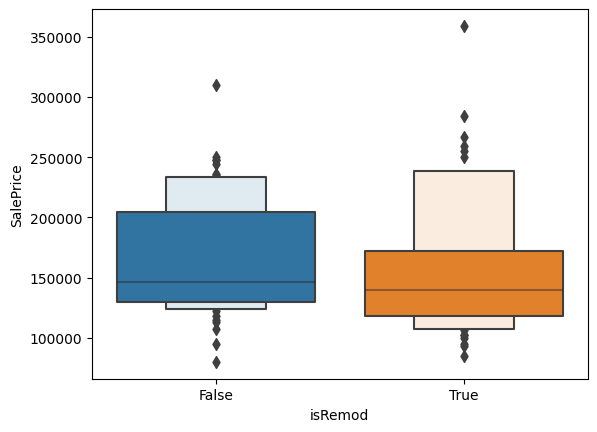

In [47]:
sns.boxenplot(data=df_train.query(condition_average), x='isRemod', y='SalePrice')

<Axes: xlabel='isRemod', ylabel='SalePrice'>

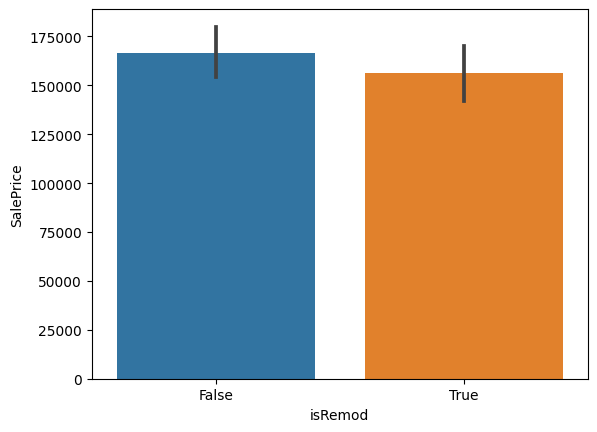

In [48]:
sns.barplot(data=df_train.query(condition_average), x='isRemod', y='SalePrice')

<Axes: xlabel='AgeFromRemod', ylabel='SalePrice'>

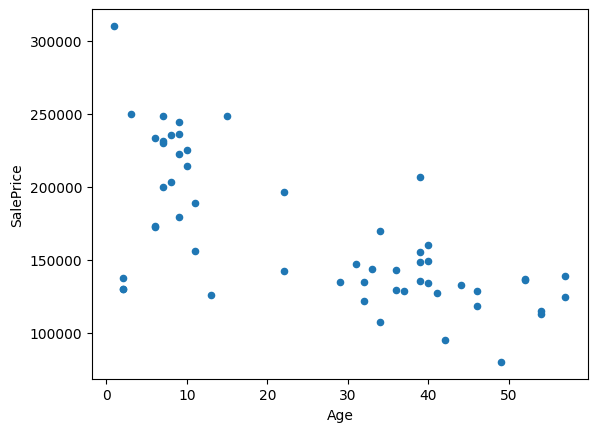

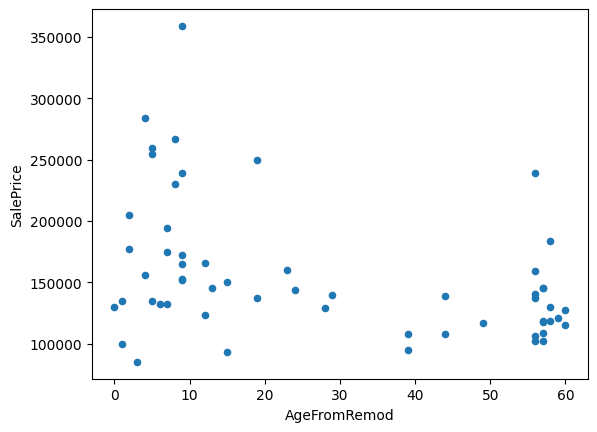

In [49]:
df_train.query(condition_average+"& isRemod == False").plot(kind='scatter', x='Age', y='SalePrice')
df_train.query(condition_average+"& isRemod == True").plot(kind='scatter', x='AgeFromRemod', y='SalePrice')

<Axes: xlabel='Age', ylabel='SalePrice'>

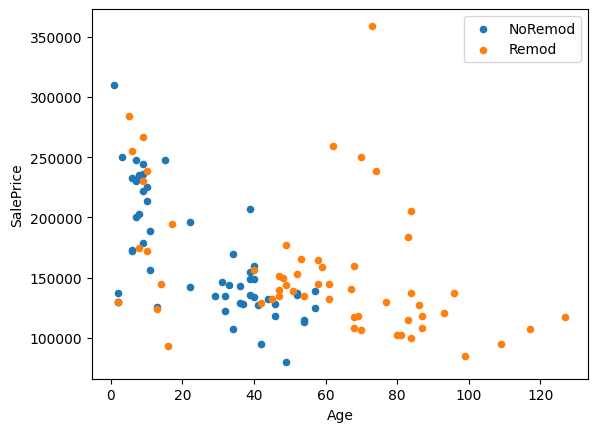

In [50]:
ax = df_train.query(condition_average+"& isRemod == False").plot(kind='scatter', x='Age', y='SalePrice', label='NoRemod')
df_train.query(condition_average+"& isRemod == True").plot(kind='scatter', x='Age', y='SalePrice', ax=ax, color='C1', label='Remod')

<Axes: xlabel='AgeFromRemod', ylabel='SalePrice'>

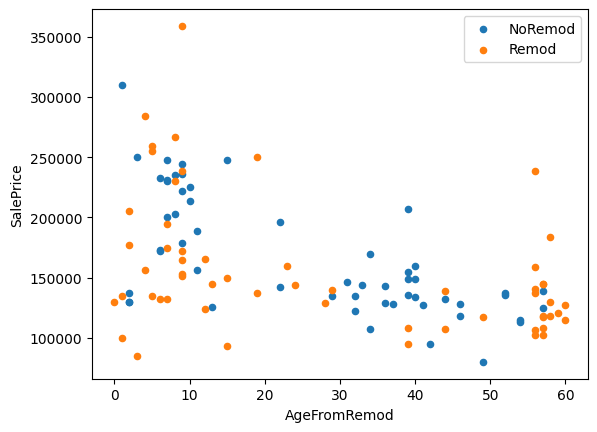

In [51]:
ax = df_train.query(condition_average+"& isRemod == False").plot(kind='scatter', x='Age', y='SalePrice', label='NoRemod')
df_train.query(condition_average+"& isRemod == True").plot(kind='scatter', x='AgeFromRemod', y='SalePrice', ax=ax, color='C1', label='Remod')

#### ✔Basically, the SalePrice decreases over time, but the decrease tends to be reset by remodeling.

## 6. Deploy

In [52]:
df_test_2['SalePrice'] = np.NaN
X_test = df_test_2.drop(['SalePrice'], axis=1)
y_preds_test = reg.predict(X_test)

In [53]:
df_deploy = pd.DataFrame({"Id": df_test.Id, "SalePrice": np.exp(y_preds_test)})

In [54]:
df_deploy.head()

Id      SalePrice
0  1461  125966.315341
1  1462  150394.401722
2  1463  184320.192162
3  1464  203768.317243
4  1465  193160.337098

In [55]:
df_deploy.to_csv("housePricePredictions.csv", index=False)

In [56]:
! pip freeze > requirements.txt